<img src="https://www.mmu.edu.my/fci/wp-content/uploads/2021/01/FCI_wNEW_MMU_LOGO.png" style="height: 80px;" align=left>  

## Assignment Objective
The aim of this assignment is to guide you through the process of understanding a dataset,
performing preprocessing, building classification models, including ensemble learning techniques,
and evaluation using cross-validation and various metrics.

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from apyori import apriori
import math 
#settings for seaborn plots
sns.set(style="whitegrid", color_codes=True)
sns.set(rc={'figure.figsize':(11,6)})

## Data Exploration


In [2]:
df = pd.read_csv('Student_dataset.csv')
df.head()

Marital status  Application mode  Application order  Course  \
0               1              17.0                  5   171.0   
1               1              15.0                  1  9254.0   
2               1               1.0                  5  9070.0   
3               1              17.0                  2  9773.0   
4               2              39.0                  1  8014.0   

   Daytime/evening attendance\t  Previous qualification  \
0                             1                       1   
1                             1                       1   
2                             1                       1   
3                             1                       1   
4                             0                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                           122.0            1                    19.0   
1                           160.0            1                     1.0   
2                           122.0            1                    37.0   
3                           122.0            1                    38.0   
4                           100.0            1                    37.0   

   Father's qualification  ...  Curricular units 2nd sem (credited)  \
0                      12  ...                                    0   
1                       3  ...                                    0   
2                      37  ...                                    0   
3                      37  ...                                    0   
4                      38  ...                                    0   

   Curricular units 2nd sem (enrolled)  \
0                                    0   
1                                    6   
2                                    6   
3                                    6   
4                                    6   

   Curricular units 2nd sem (evaluations)  \
0                                       0   
1                                       6   
2                                       0   
3                                      10   
4                                       6   

   Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
0                                    0                          0.000000   
1                                    6                         13.666667   
2                                    0                          0.000000   
3                                    5                         12.400000   
4                                    6                         13.000000   

   Curricular units 2nd sem (without evaluations)  Unemployment rate  \
0                                               0               10.8   
1                                               0               13.9   
2                                               0               10.8   
3                                               0                9.4   
4                                               0               13.9   

   Inflation rate   GDP    Target  
0             1.4  1.74   Dropout  
1            -0.3  0.79  Graduate  
2             1.4  1.74   Dropout  
3            -0.8 -3.12  Graduate  
4            -0.3  0.79  Graduate  

[5 rows x 37 columns]

## List of datatypes, duplicates and Null-values 

In [3]:
#understanding rows and attribute types
print('No. of records and attributes: ',df.shape)
print('List of attributes: ',df.columns)
display(df.info())

No. of records and attributes:  (4446, 37)
List of attributes:  Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Cu

None

### List of data contained Null-values

In [4]:
df2 = df
df2.isna().sum()

Marital status                                     0
Application mode                                   2
Application order                                  0
Course                                             6
Daytime/evening attendance\t                       0
Previous qualification                             0
Previous qualification (grade)                     7
Nacionality                                        0
Mother's qualification                             3
Father's qualification                             0
Mother's occupation                                0
Father's occupation                                0
Admission grade                                   18
Displaced                                          3
Educational special needs                          0
Debtor                                             2
Tuition fees up to date                            0
Gender                                             0
Scholarship holder                            

#### From the above we can observe the list of attributes that contain NaN values: 
* Application mode
* Course
* Previous qualification (grade)
* Mother's qualification
* Admission grade
* Displaced
* Debtor
* Scholarship holder 
* Age at enrollment

In [5]:
# Check for duplicate rows
duplicates = df2.duplicated().sum()

# Display rows that are duplicates
print(f"Numbers of duplicated Rows: {duplicates}")

Numbers of duplicated Rows: 22


In [6]:
after_duplicates = df2.drop_duplicates()
print(f"Numbers of duplicates after drop {after_duplicates.shape}")

Numbers of duplicates after drop (4424, 37)


### Numerical Attributes with Null-values

In [7]:
# Select numerical columns
numerical_columns = df2.select_dtypes(['int64', 'float64'])

# Find numerical columns with null values
numerical_with_nulls = numerical_columns.columns[numerical_columns.isna().any()]

# Display only numerical columns with null values
print("Numerical columns with null values:")
print(numerical_with_nulls)

Numerical columns with null values:
Index(['Application mode', 'Course', 'Previous qualification (grade)',
       'Mother's qualification', 'Admission grade', 'Displaced', 'Debtor',
       'Scholarship holder', 'Age at enrollment'],
      dtype='object')


#### Numerical attributes description/normalization

In [8]:
# Describe only the numerical columns with null values
described_null_attributes = numerical_columns[numerical_with_nulls].describe()

# Display the description
print("Description of numerical attributes with null values:")
described_null_attributes

Description of numerical attributes with null values:


Application mode       Course  Previous qualification (grade)  \
count       4444.000000  4440.000000                     4439.000000   
mean          18.663816  8858.807432                      132.640572   
std           17.490937  2060.398841                       13.221879   
min            1.000000    33.000000                       95.000000   
25%            1.000000  9085.000000                      125.000000   
50%           17.000000  9238.000000                      133.100000   
75%           39.000000  9556.000000                      140.000000   
max           57.000000  9991.000000                      190.000000   

       Mother's qualification  Admission grade    Displaced       Debtor  \
count             4443.000000      4428.000000  4443.000000  4444.000000   
mean                19.552104       126.986066     0.548728     0.113636   
std                 15.610384        14.480251     0.497676     0.317405   
min                  1.000000        95.000000     0.000000     0.000000   
25%                  2.000000       117.900000     0.000000     0.000000   
50%                 19.000000       126.100000     1.000000     0.000000   
75%                 37.000000       134.800000     1.000000     0.000000   
max                 44.000000       190.000000     1.000000     1.000000   

       Scholarship holder  Age at enrollment  
count         4444.000000        4442.000000  
mean             0.248650          23.268798  
std              0.432279           7.595064  
min              0.000000          17.000000  
25%              0.000000          19.000000  
50%              0.000000          20.000000  
75%              0.000000          25.000000  
max              1.000000          70.000000

#### Fill in Null-values with means (numerical attributes)

In [9]:
# List of numerical attributes with null values
numerical_with_nulls = [
    'Application mode', 
    'Course', 
    'Previous qualification (grade)',
    "Mother's qualification", 
    'Admission grade', 
    'Displaced', 
    'Debtor', 
    'Scholarship holder', 
    'Age at enrollment'
]

# Replace null values with the mean for the specified columns
for col in numerical_with_nulls:
    if col in df2.columns:  # Ensure the column exists in the DataFrame
         df2[col] = df2[col].fillna(df2[col].mean())

# Verify that null values are replaced
print("Null values after replacement:")
print(df2.isna().sum())  # Should show 0 for all columns


Null values after replacement:
Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder               

In [10]:
# Initialize categories
continuous_features = []
ordinal_features = []
ratio_features = []
binary_features = []

# Categorize features
for col in df2.columns:
    unique_vals = df2[col].nunique()
    if df2[col].dtype in ['int64', 'float64']:
        if unique_vals == 2:
            binary_features.append(col)  # Binary (Yes/No, Male/Female)
        elif unique_vals > 10:
            if col.lower().endswith(('grade', 'percentage', 'score')):
                continuous_features.append(col)  # Likely Continuous
            else:
                ratio_features.append(col)  # Likely Ratio
        else:
            ordinal_features.append(col)  # Small range, likely Ordinal
    elif df2[col].dtype == 'object':
        if unique_vals == 2:
            binary_features.append(col)  # Binary categorical
        else:
            ordinal_features.append(col)  # Ordinal categorical

# Print categorized features
print(f"\nContinuous Features:", continuous_features)
print(f"\nOrdinal Features:", ordinal_features)
print(f"\nRatio Features:", ratio_features)
print(f"\nBinary Features:", binary_features)


Continuous Features: ['Admission grade']

Ordinal Features: ['Marital status', 'Application order', 'Displaced', 'Debtor', 'Scholarship holder', 'Curricular units 2nd sem (without evaluations)', 'Unemployment rate', 'Inflation rate', 'GDP', 'Target']

Ratio Features: ['Application mode', 'Course', 'Previous qualification', 'Previous qualification (grade)', 'Nacionality', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Age at enrollment', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)']

Binary Features: ['Daytime/evening attendance\t', 'Educational sp

C:\Users\ASUS\AppData\Local\Temp\ipykernel_25476\1528727100.py:36: UserWarning: Glyph 9 (	) missing from current font.
  plt.tight_layout()
C:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


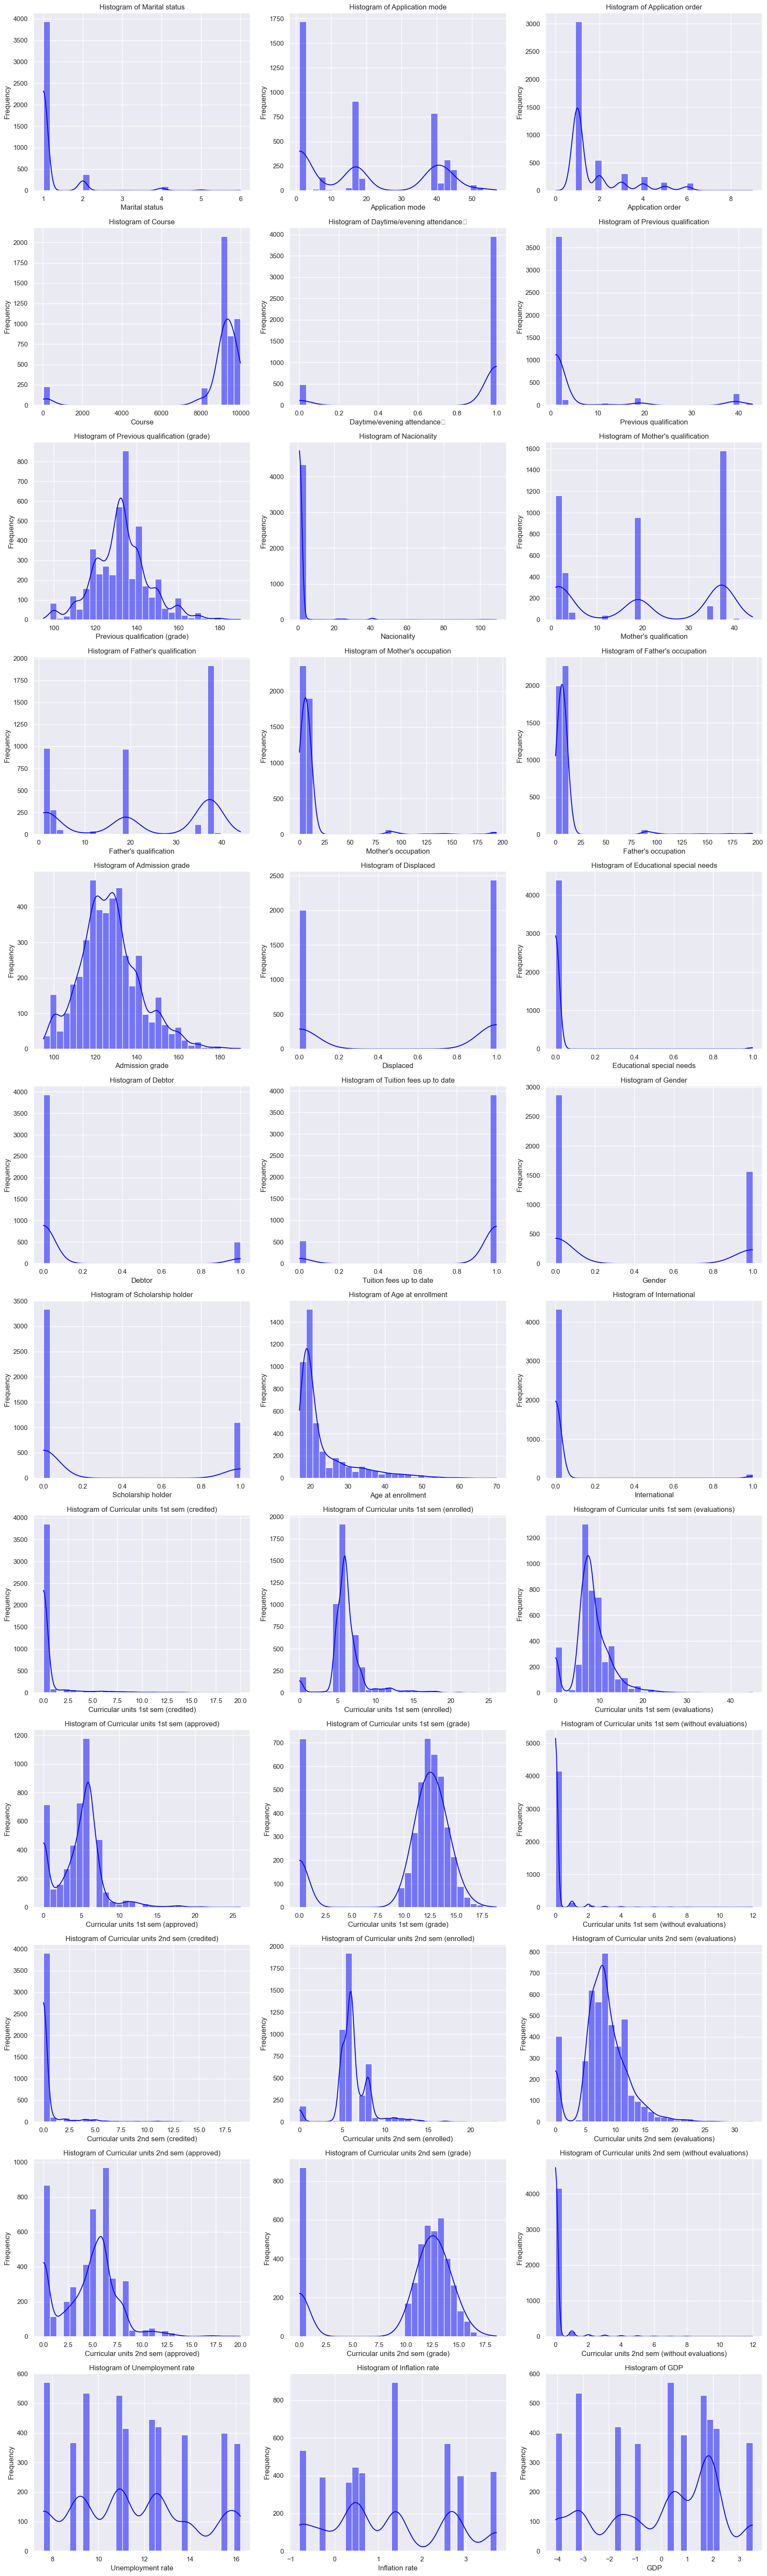

In [11]:
# Combine both for a single visualization layout
all_columns = list(numerical_columns)

# Define the layout
columns_per_row = 3  # Number of plots per row
num_columns = len(all_columns)
num_rows = math.ceil(num_columns / columns_per_row)
# Create subplots
fig, axes = plt.subplots(num_rows, columns_per_row, figsize=(18, num_rows * 5))
axes = axes.flatten()  # Flatten the axes array for easier iteration

# Plot each attribute
for idx, column in enumerate(all_columns):
    ax = axes[idx]
    
    if column in numerical_columns:
        # Plot histograms with KDE for numerical columns
        sns.histplot(df2[column], kde=True, ax=ax, bins=30, color='blue')
        ax.set_title(f"Histogram of {column}")
        ax.set_xlabel(column)
        ax.set_ylabel("Frequency")
    elif column in categorical_columns:
        # Plot count plots for categorical columns
        sns.countplot(x=df2[column], ax=ax, palette="viridis", hue=None)
        ax.set_title(f"Count of {column}")
        ax.set_xlabel(column)
        ax.set_ylabel("Count")
        # Rotate labels for better visibility
        ax.tick_params(axis='x', rotation=45)

# Hide unused subplots
for idx in range(num_columns, len(axes)):
    axes[idx].axis("off")

# Adjust layout
plt.tight_layout()
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_25476\143957132.py:18: UserWarning: Glyph 9 (	) missing from current font.
  plt.tight_layout()
C:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


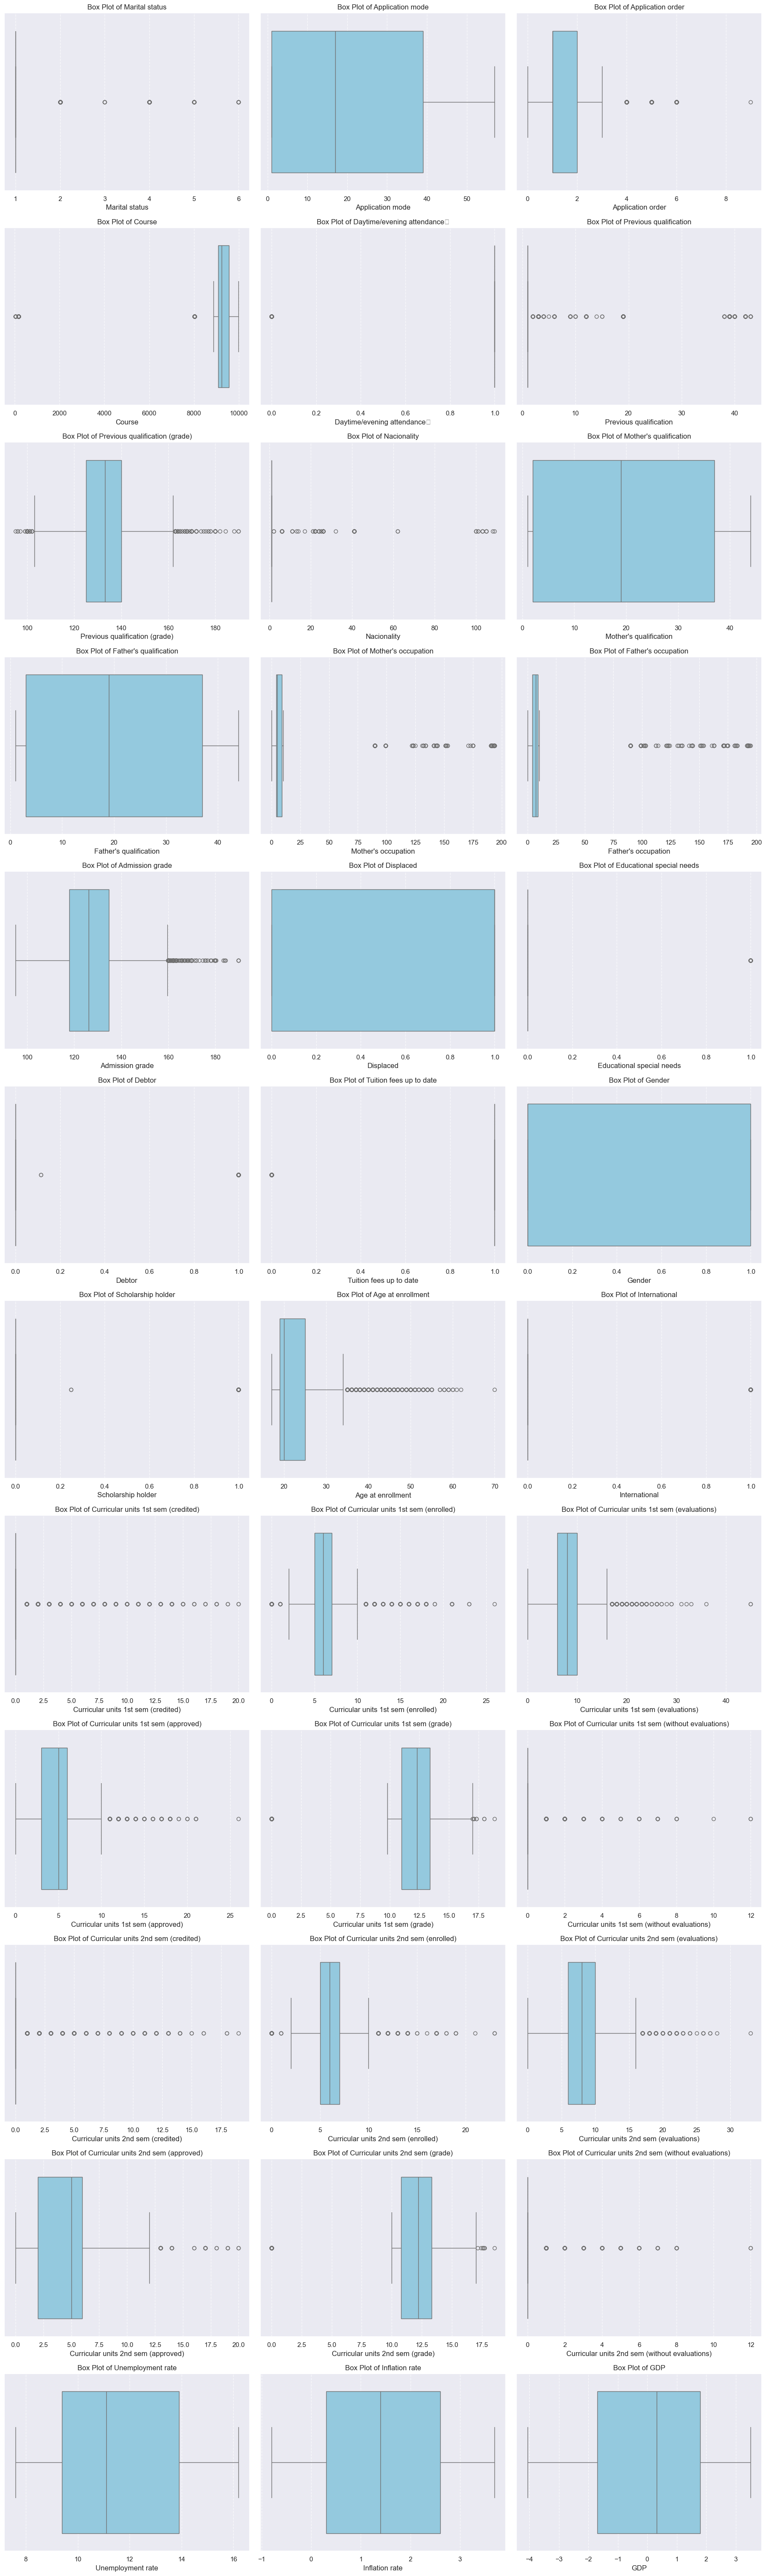

In [12]:
# Create subplots
fig, axes = plt.subplots(num_rows, columns_per_row, figsize=(18, num_rows * 5))
axes = axes.flatten()  # Flatten the axes array for easier iteration

# Plot boxplots for numerical columns
for idx, column in enumerate(numerical_columns):
    ax = axes[idx]  # Select the appropriate subplot
    sns.boxplot(x=df2[column], ax=ax, color='skyblue')  # Boxplot for each numerical column
    ax.set_title(f"Box Plot of {column}")
    ax.set_xlabel(column)
    ax.grid(axis='x', linestyle='--', alpha=0.7)

# Hide unused subplots
for idx in range(num_columns, len(axes)):
    axes[idx].axis("off")

# Adjust layout
plt.tight_layout()
plt.show()

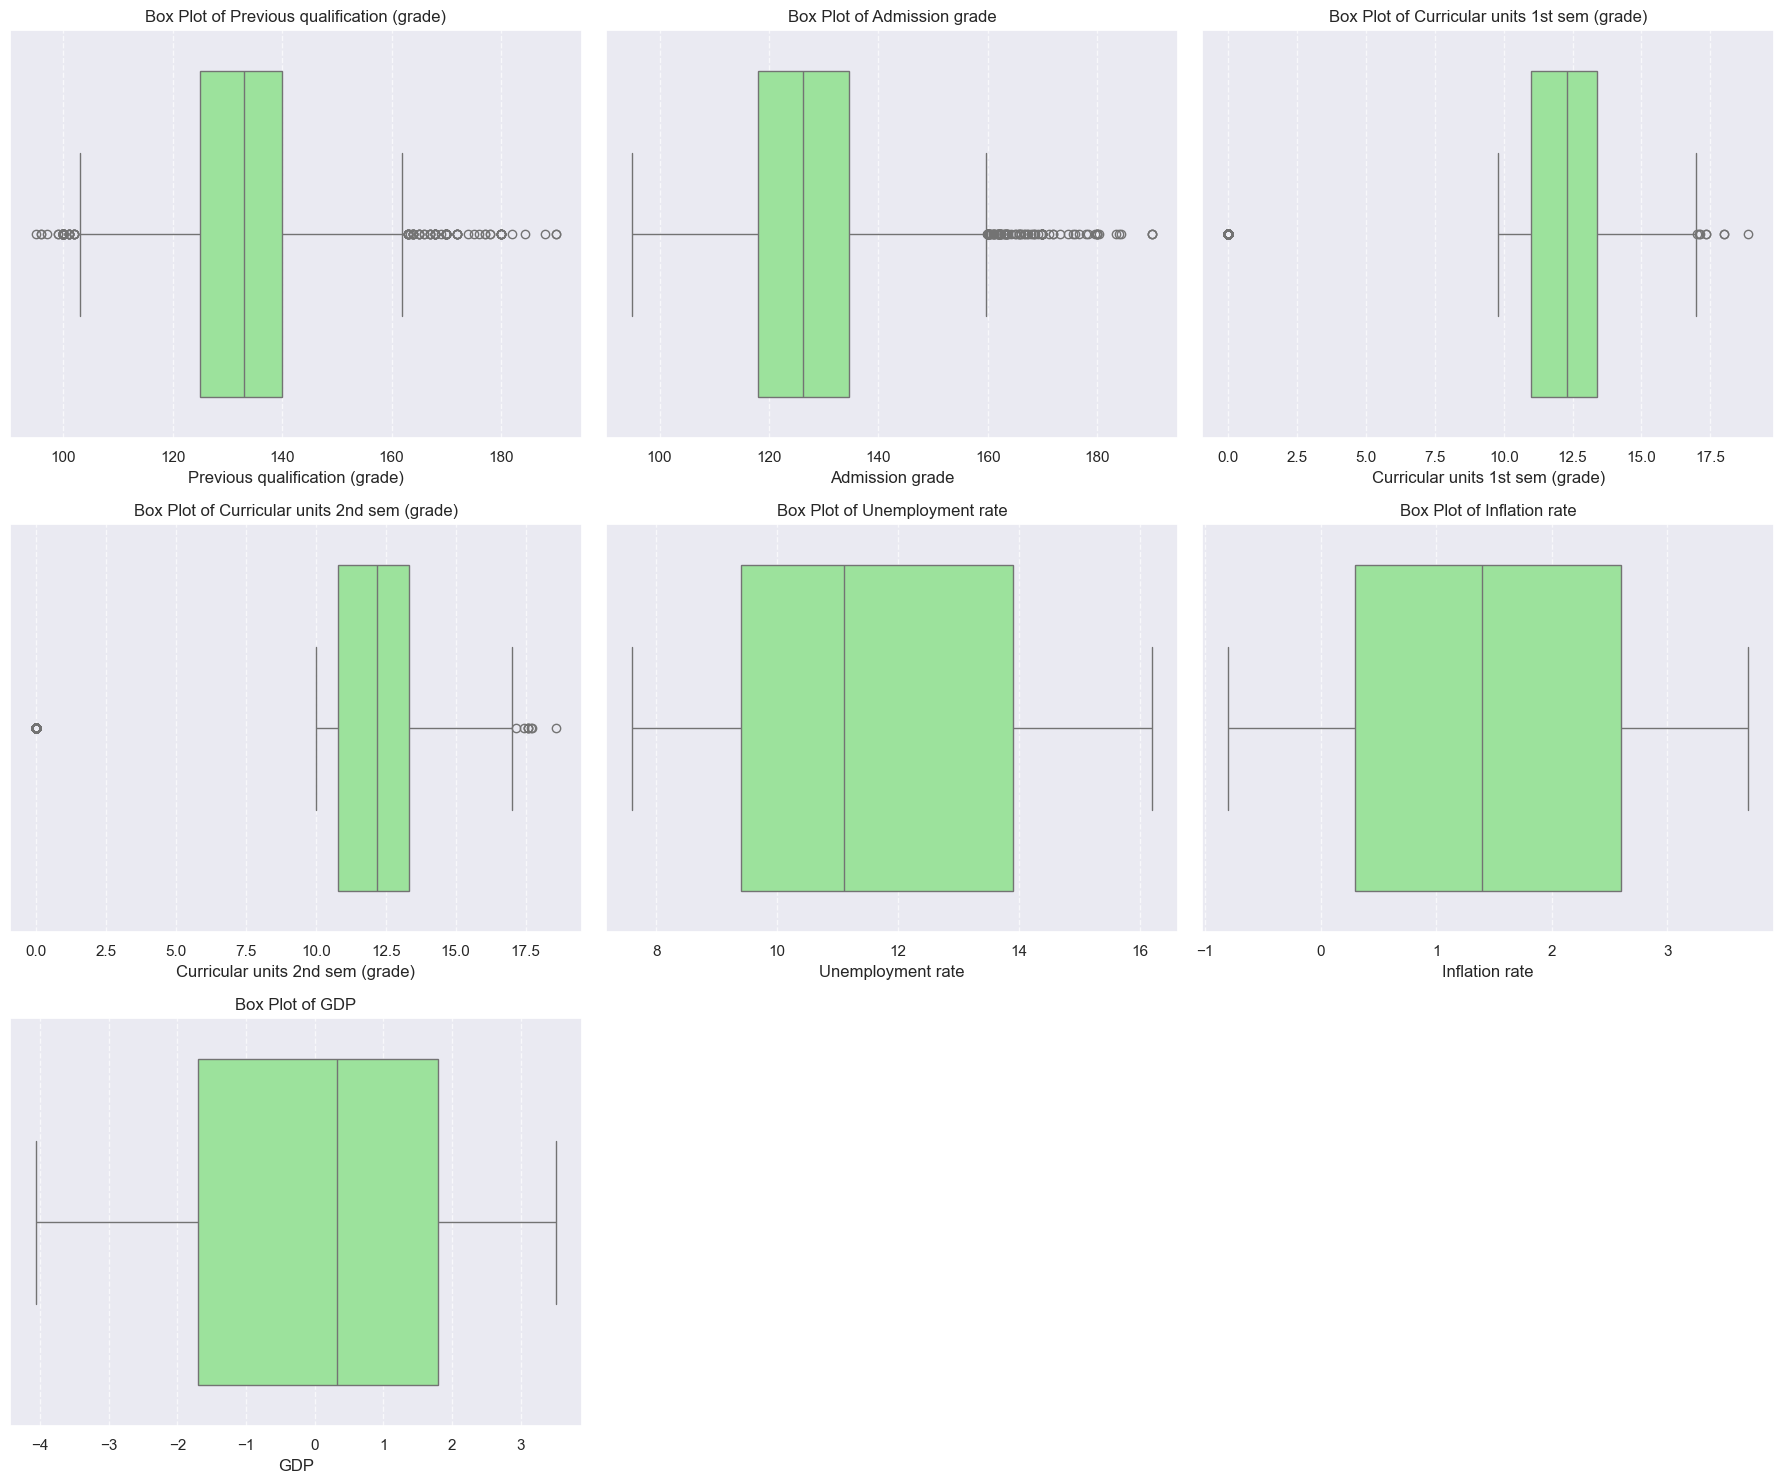

In [13]:
# Define continuous features (manually or dynamically)
# Example: Replace 'feature1', 'feature2', etc., with actual column names
continuous_features = [ 'Previous qualification (grade)',
    'Admission grade',
    'Curricular units 1st sem (grade)',
    'Curricular units 2nd sem (grade)',
    'Unemployment rate',
    'Inflation rate',
    'GDP']  # Replace this with your continuous feature names

# Check if the continuous features exist in the dataset
continuous_features = [col for col in continuous_features if col in df2.columns]

# Define the layout
columns_per_row = 3  # Number of plots per row
num_features = len(continuous_features)
num_rows = math.ceil(num_features / columns_per_row)

# Create subplots
fig, axes = plt.subplots(num_rows, columns_per_row, figsize=(18, num_rows * 5))
axes = axes.flatten()  # Flatten the axes array for easier iteration

# Plot boxplots for continuous features
for idx, column in enumerate(continuous_features):
    ax = axes[idx]  # Select the appropriate subplot
    sns.boxplot(x=df2[column], ax=ax, color='lightgreen')  # Boxplot for each continuous feature
    ax.set_title(f"Box Plot of {column}")
    ax.set_xlabel(column)
    ax.grid(axis='x', linestyle='--', alpha=0.7)

# Hide unused subplots
for idx in range(num_features, len(axes)):
    axes[idx].axis("off")

# Adjust layout
plt.tight_layout()
plt.show()

#### Categorial description 

In [14]:
#exploring categotical data
categorical_columns = df2.select_dtypes(['object']).describe()
categorical_columns

Target
count       4446
unique         3
top     Graduate
freq        2221

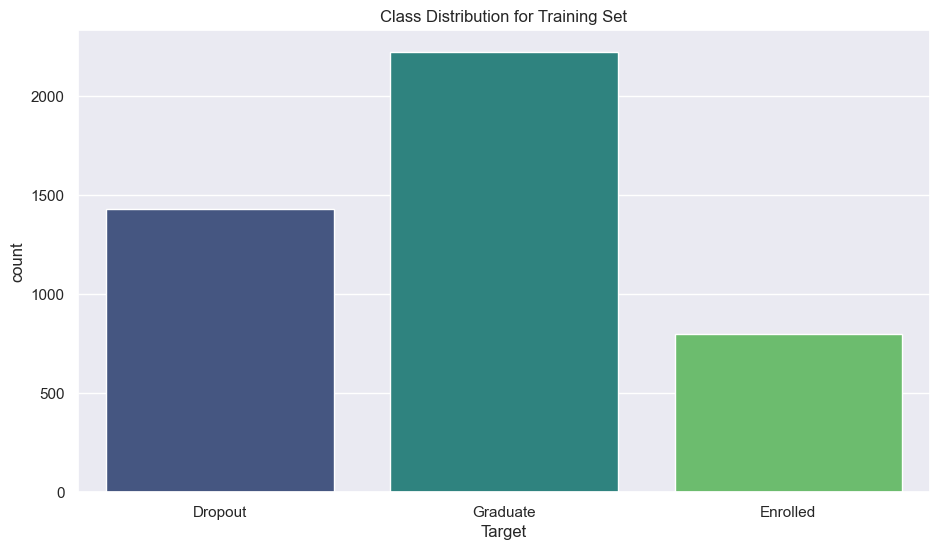

In [15]:
plt.figure()
sns.countplot(  data=df2, x='Target', hue='Target', palette='viridis', dodge=False, )
plt.title('Class Distribution for Training Set')
plt.show()

---
# Data Preprocessing

#### Collerration analysis

In [16]:
numeric_df = df2.select_dtypes(include='number')
corr = numeric_df.corr(method='pearson')
corr

Marital status  \
Marital status                                        1.000000   
Application mode                                      0.264711   
Application order                                    -0.126252   
Course                                                0.046659   
Daytime/evening attendance\t                         -0.274427   
Previous qualification                                0.063742   
Previous qualification (grade)                       -0.023429   
Nacionality                                          -0.009861   
Mother's qualification                                0.193879   
Father's qualification                                0.130684   
Mother's occupation                                   0.034748   
Father's occupation                                   0.031306   
Admission grade                                      -0.005341   
Displaced                                            -0.235897   
Educational special needs                            -0.028334   
Debtor                                                0.035350   
Tuition fees up to date                              -0.090316   
Gender                                               -0.014820   
Scholarship holder                                   -0.054892   
Age at enrollment                                     0.523642   
International                                        -0.028539   
Curricular units 1st sem (credited)                   0.059927   
Curricular units 1st sem (enrolled)                   0.051672   
Curricular units 1st sem (evaluations)                0.059362   
Curricular units 1st sem (approved)                  -0.032256   
Curricular units 1st sem (grade)                     -0.059445   
Curricular units 1st sem (without evaluations)        0.034238   
Curricular units 2nd sem (credited)                   0.061421   
Curricular units 2nd sem (enrolled)                   0.038564   
Curricular units 2nd sem (evaluations)                0.023682   
Curricular units 2nd sem (approved)                  -0.044325   
Curricular units 2nd sem (grade)                     -0.071273   
Curricular units 2nd sem (without evaluations)        0.020022   
Unemployment rate                                    -0.019977   
Inflation rate                                        0.008251   
GDP                                                  -0.025820   

                                                Application mode  \
Marital status                                          0.264711   
Application mode                                        1.000000   
Application order                                      -0.286173   
Course                                                  0.062793   
Daytime/evening attendance\t                           -0.304041   
Previous qualification                                  0.423106   
Previous qualification (grade)                         -0.041266   
Nacionality                                            -0.004277   
Mother's qualification                                  0.121161   
Father's qualification                                  0.084391   
Mother's occupation                                     0.051566   
Father's occupation                                     0.036665   
Admission grade                                        -0.014251   
Displaced                                              -0.301973   
Educational special needs                              -0.030666   
Debtor                                                  0.122653   
Tuition fees up to date                                -0.135586   
Gender                                                  0.160173   
Scholarship holder                                     -0.163791   
Age at enrollment                                       0.514627   
International                                           0.001285   
Curricular units 1st sem (credited)                     0.249117   
Curricular units 1st sem (enrolled)      

C:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()
C:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


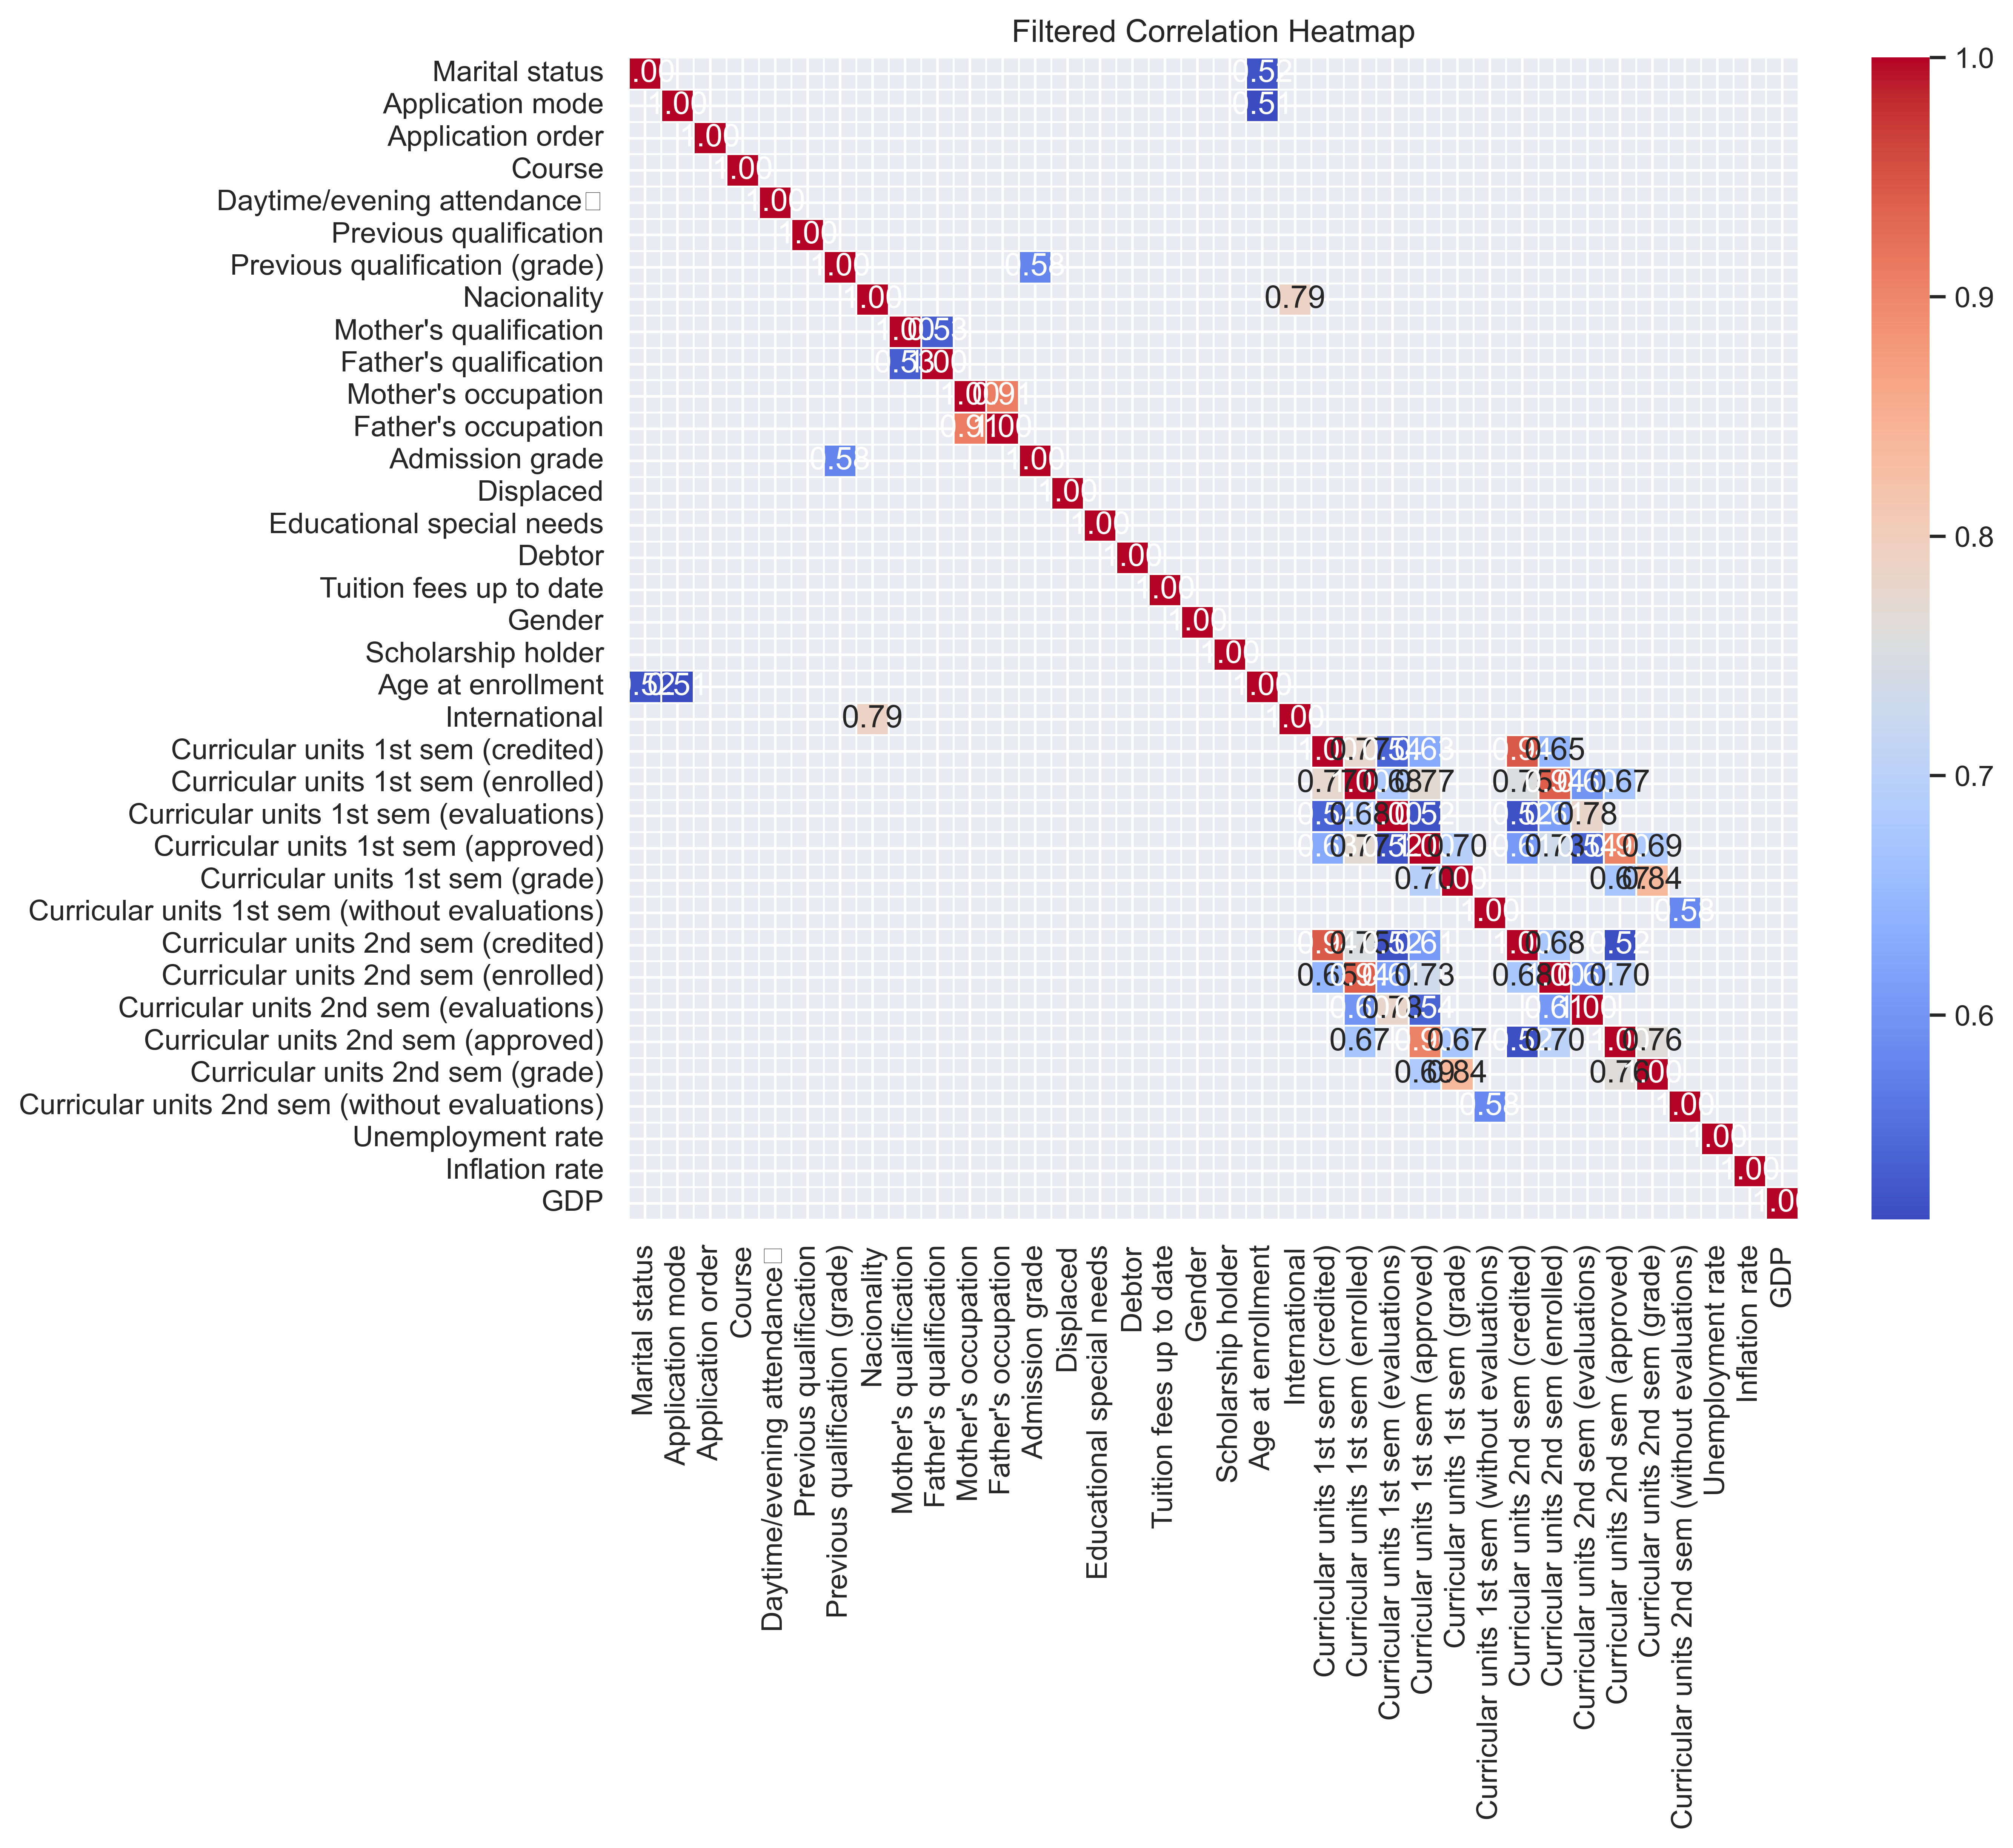

In [17]:
corr_threshold = 0.5
filtered_corr = corr[(corr > corr_threshold) | (corr < -corr_threshold)]

plt.figure(figsize=(10, 8), dpi=500)
sns.heatmap(filtered_corr, annot=True, fmt=".2f", linewidths=0.5, cmap="coolwarm", mask=filtered_corr.isnull())
plt.title("Filtered Correlation Heatmap")
plt.show()

In [18]:
# Flatten the correlation matrix and sort
corr_flat = corr.unstack().reset_index()
corr_flat.columns = ['Attribute 1', 'Attribute 2', 'Correlation']
corr_flat['AbsCorrelation'] = corr_flat['Correlation'].abs()

# Remove duplicates (e.g., "Attribute A - Attribute B" and "Attribute B - Attribute A")
corr_flat = corr_flat[corr_flat['Attribute 1'] != corr_flat['Attribute 2']]  # Remove self-correlations
top_10_corr = corr_flat.sort_values(by='AbsCorrelation', ascending=False).head(20)
corr_flat = corr_flat.drop_duplicates(subset=['AbsCorrelation'])

# Sort by absolute correlation and select the top 10
top_10_unique_corr = corr_flat.sort_values(by='AbsCorrelation', ascending=False).head(10)

# Display the top 10 correlations
print("Top 10 Highest Correlations:")
top_10_unique_corr[['Attribute 1', 'Attribute 2', 'Correlation']]


Top 10 Highest Correlations:


Attribute 1  \
783      Curricular units 1st sem (credited)   
820      Curricular units 1st sem (enrolled)   
371                      Mother's occupation   
894      Curricular units 1st sem (approved)   
931         Curricular units 1st sem (grade)   
272                              Nacionality   
857   Curricular units 1st sem (evaluations)   
778      Curricular units 1st sem (credited)   
816      Curricular units 1st sem (enrolled)   
1111     Curricular units 2nd sem (approved)   

                                 Attribute 2  Correlation  
783      Curricular units 2nd sem (credited)     0.944527  
820      Curricular units 2nd sem (enrolled)     0.942590  
371                      Father's occupation     0.910450  
894      Curricular units 2nd sem (approved)     0.903340  
931         Curricular units 2nd sem (grade)     0.837285  
272                            International     0.788719  
857   Curricular units 2nd sem (evaluations)     0.778841  
778      Curricular units 1st sem (enrolled)     0.774612  
816      Curricular units 1st sem (approved)     0.768841  
1111        Curricular units 2nd sem (grade)     0.759691

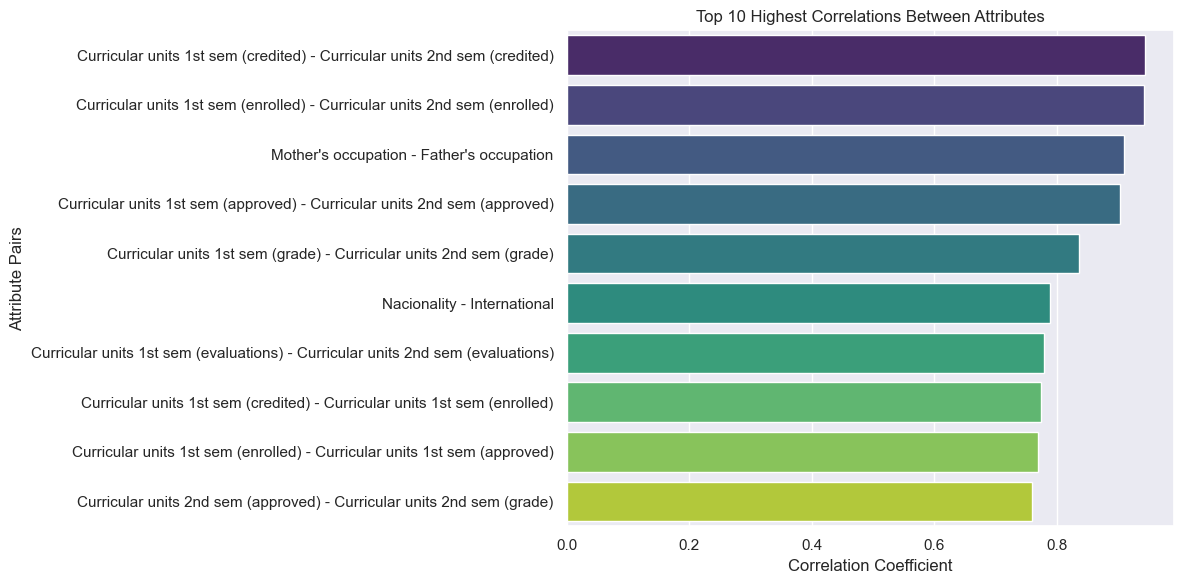

In [19]:
# Plot the Top 10 Correlations
plt.figure(figsize=(12, 6))
sns.barplot(
    x=top_10_unique_corr['Correlation'], 
    y=top_10_unique_corr.apply(lambda x: f"{x['Attribute 1']} - {x['Attribute 2']}", axis=1),
    palette="viridis", hue =top_10_unique_corr.apply(lambda x: f"{x['Attribute 1']} - {x['Attribute 2']}", axis=1)
)
plt.title("Top 10 Highest Correlations Between Attributes")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Attribute Pairs")
plt.tight_layout()
plt.show()

## HeatMap Collerration

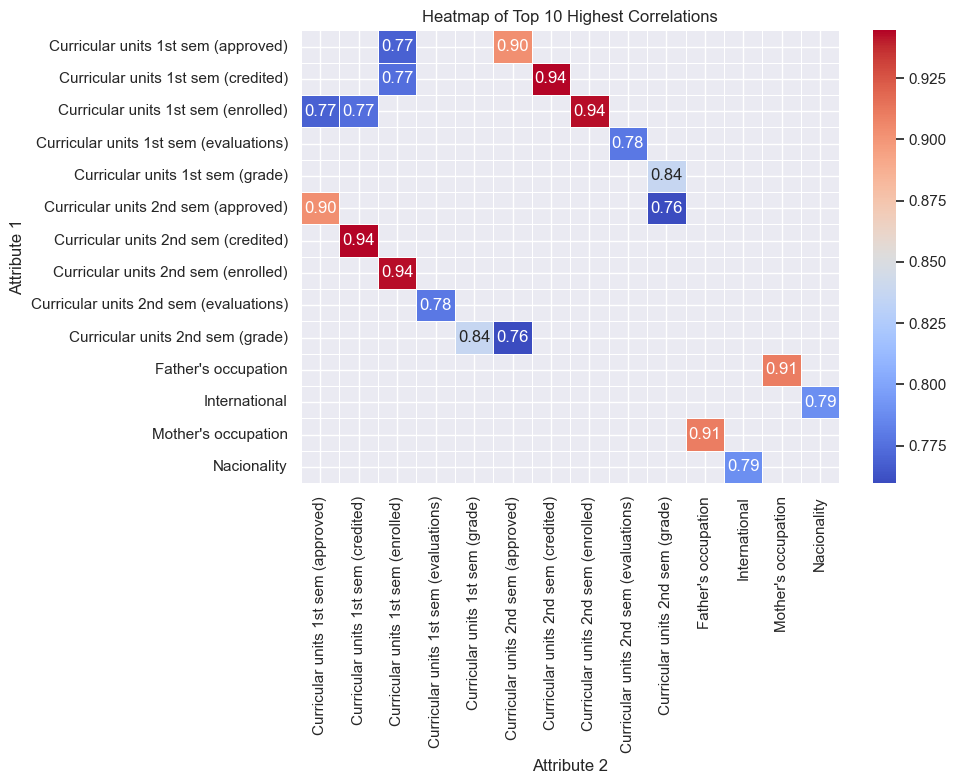

In [20]:
# Create a pivot table for the heatmap
heatmap_data = top_10_corr.pivot(index = "Attribute 1", columns="Attribute 2",values = "Correlation")

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap of Top 10 Highest Correlations")
plt.tight_layout()
plt.show()


### Curricular units 1st sem (credited)	Curricular units 2nd sem (credited)

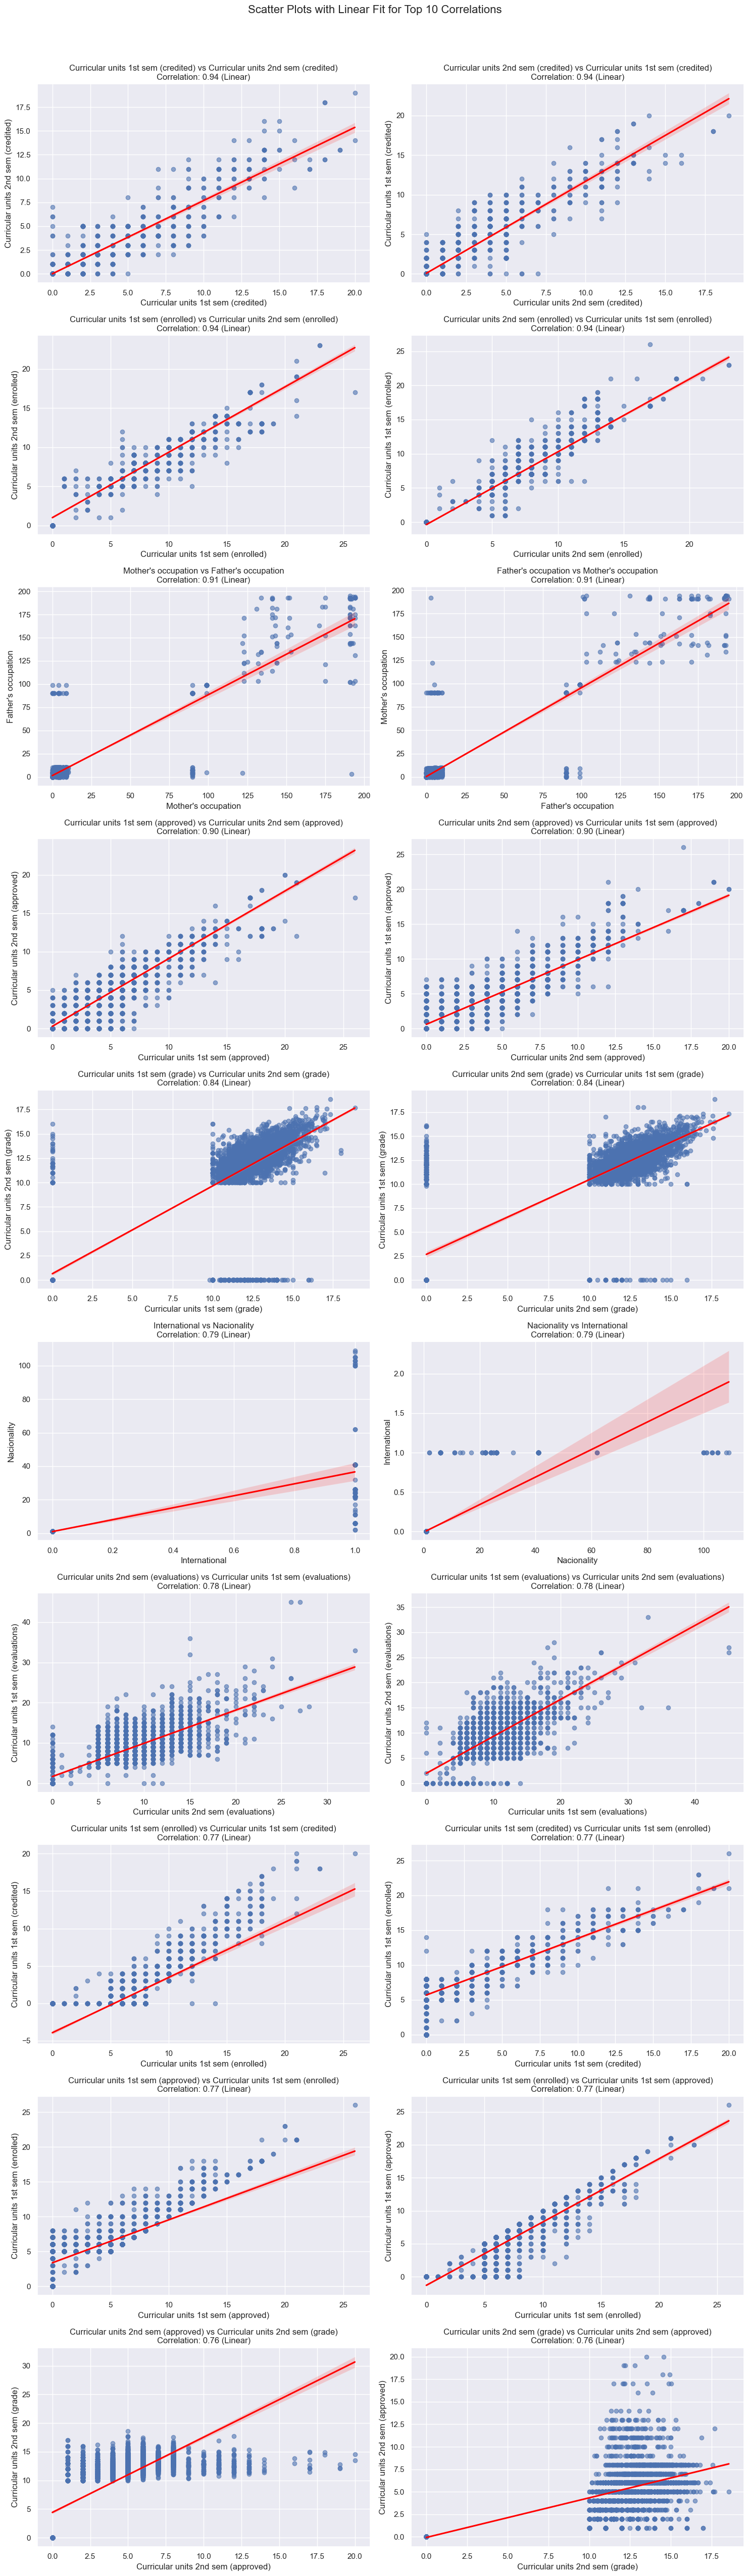

In [21]:
from scipy.stats import pearsonr

# Create scatter plots for the top 5 correlations with linear fit and linearity check
num_plots = len(top_10_corr)  # Number of correlations to plot
rows = (num_plots + 1) // 2  # Calculate rows needed for 2 columns

plt.figure(figsize=(15, rows * 5))  # Dynamically adjust the figure size

for i, row in enumerate(top_10_corr.itertuples(), 1):
    feature1 = row._1  # Feature 1
    feature2 = row._2  # Feature 2

    # Compute Pearson correlation coefficient
    correlation, _ = pearsonr(df2[feature1], df2[feature2])
    linearity = "Linear" if abs(correlation) > 0.7 else "Non-linear"

    # Create a subplot
    plt.subplot(rows, 2, i)
    sns.regplot(x=df2[feature1], y=df2[feature2], line_kws={'color': 'red'}, scatter_kws={'alpha': 0.6})
    plt.title(f'{feature1} vs {feature2}\nCorrelation: {correlation:.2f} ({linearity})')
    plt.xlabel(feature1)
    plt.ylabel(feature2)

plt.tight_layout()
plt.suptitle('Scatter Plots with Linear Fit for Top 10 Correlations', y=1.02, fontsize=16)
plt.show()

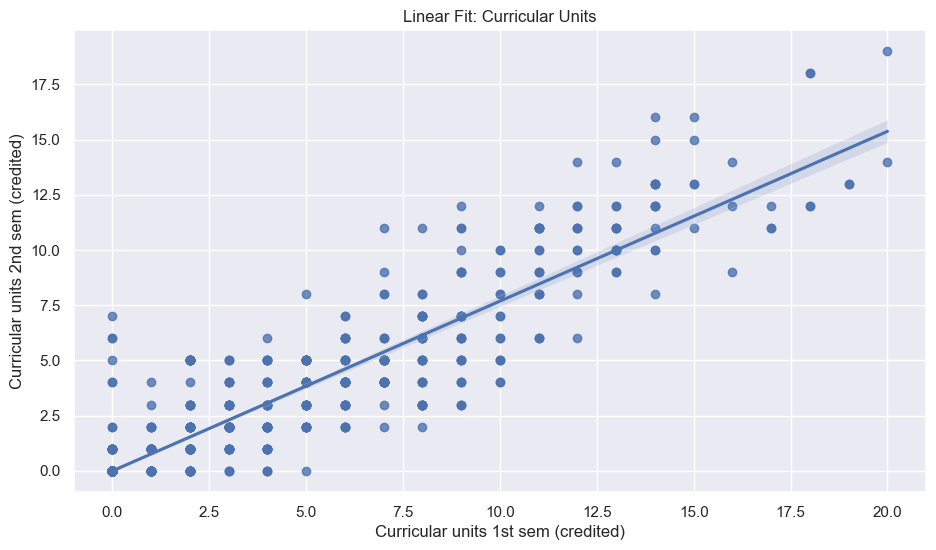

In [22]:
sns.regplot(x='Curricular units 1st sem (credited)', y='Curricular units 2nd sem (credited)', data=df2)
plt.title("Linear Fit: Curricular Units")
plt.show()


In [23]:
corr = df2[['Curricular units 1st sem (credited)', 'Curricular units 2nd sem (credited)']].corr()
corr

Curricular units 1st sem (credited)  \
Curricular units 1st sem (credited)                             1.000000   
Curricular units 2nd sem (credited)                             0.944527   

                                     Curricular units 2nd sem (credited)  
Curricular units 1st sem (credited)                             0.944527  
Curricular units 2nd sem (credited)                             1.000000

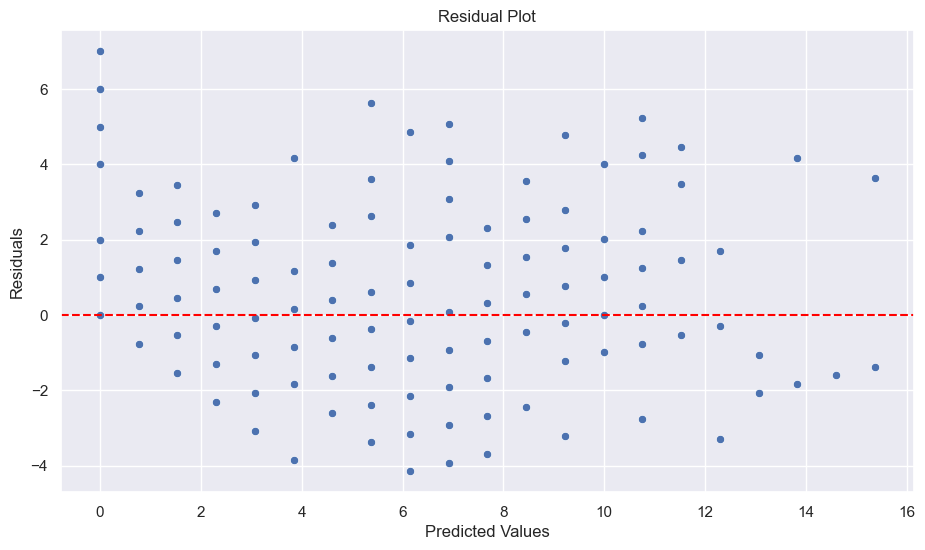

In [24]:
from sklearn.linear_model import LinearRegression

# Fit a simple linear regression
X = df2[['Curricular units 1st sem (credited)']].dropna()  # Example feature
y = df2['Curricular units 2nd sem (credited)'].dropna()
model = LinearRegression()
model.fit(X, y)

# Residual plot
predictions = model.predict(X)
residuals = y - predictions

sns.scatterplot(x=predictions, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residual Plot")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

### Spliting data
* to avoid data leakage before balencing


In [25]:
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Assuming 'data' is already loaded and contains the 'Target' column
X = df2.drop('Target', axis=1)
y = df2['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y.values.ravel(), test_size=0.3, random_state=0, stratify=y)

# Apply SMOTE for balancing
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

# Create a balanced dataset
balanced_data = pd.concat([pd.DataFrame(X_balanced, columns=X.columns), pd.DataFrame(y_balanced, columns=['Target'])], axis=1)

# Save balanced data to a CSV file
balanced_output_path = 'Student_dataset_balanced.csv'
balanced_data.to_csv(balanced_output_path, index=False)
print(f"Balanced data saved to {balanced_output_path}")

Balanced data saved to Student_dataset_balanced.csv


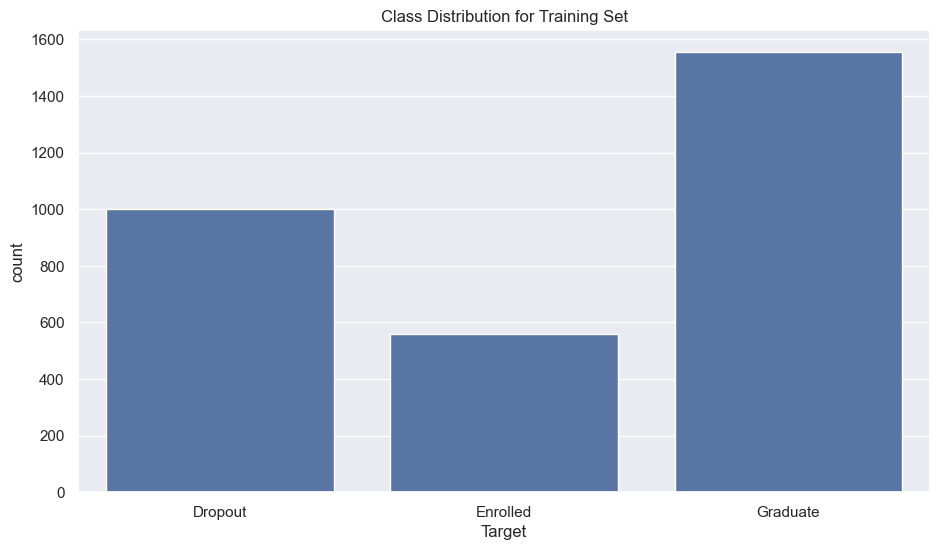

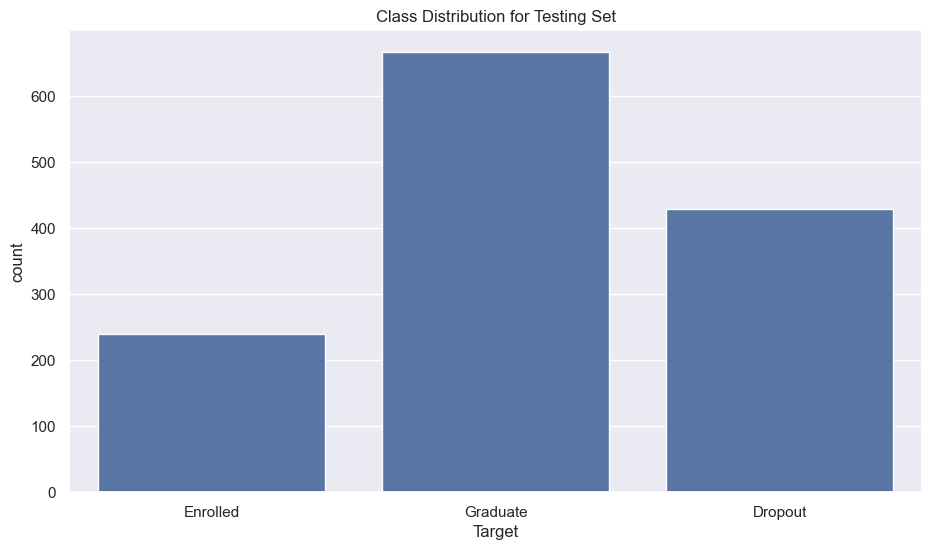

In [26]:
#visualize classes after splitting
plt.figure()
sns.countplot(x='Target', data = pd.DataFrame({'Target':y_train}))
plt.title('Class Distribution for Training Set')
plt.show()
plt.figure()
sns.countplot(x='Target', data = pd.DataFrame({'Target':y_test}))
plt.title('Class Distribution for Testing Set')
plt.show()

Right after we finish splitting, we can proceed to balance the training set using SMOTE.

For the current dataset, we have both numerical and categorical attributes. Therefore, we need to use SMOTENC, which requires the numerical data to be normalized, and also need to explicitly specify the index of the categorical columns. The following code extracts the indices of categorical columns and then normalizes the numerical values:

In [27]:
# Identify categorical and numerical columns
categorical_columns = X.select_dtypes(include=['object']).columns
numerical_columns = X.select_dtypes(include=['int64', 'float64']).columns

print("Categorical Columns:", categorical_columns)
print("Numerical Columns:", numerical_columns)


Categorical Columns: Index([], dtype='object')
Numerical Columns: Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       '

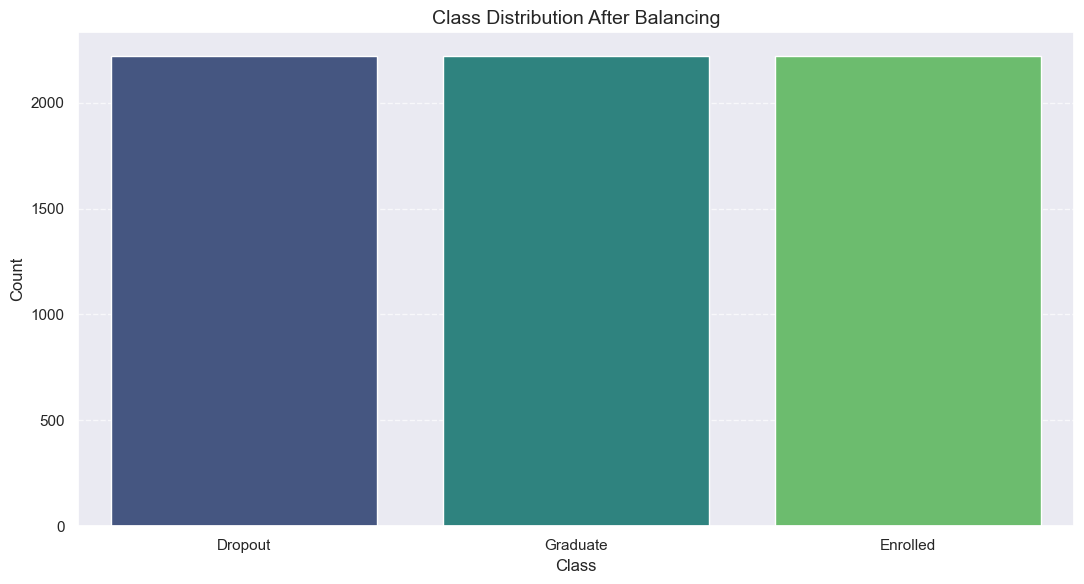

In [28]:
plt.figure()
sns.countplot(
    data=balanced_data, 
    x='Target', 
    hue='Target',  # Assign 'Target' to hue to match the palette
    palette='viridis',
    dodge=False,  # Ensures bars are not separated
    legend=False  # Removes the legend since it's redundant
)
plt.title('Class Distribution After Balancing', fontsize=14)
plt.xlabel('Class', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


The average accurary of the model should be quite high. Now let's evaluate the model with the test data. Our set of test data was not normalized yet, so lets do that first then get the average accuracy using the `score` function:

In [29]:
# Convert X_train back to a DataFrame
X_train_preprocess = pd.DataFrame(X, columns=X.columns)

# Normalize numerical attributes using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
num_attributes = X_train_preprocess.select_dtypes(['int64', 'float64']).columns  # Identify numerical columns
X_train_preprocess[num_attributes] = min_max_scaler.fit_transform(X_train_preprocess[num_attributes])

# Display the preprocessed DataFrame
X_train_preprocess.head()


Marital status  Application mode  Application order    Course  \
0             0.0          0.285714           0.555556  0.013858   
1             0.0          0.250000           0.111111  0.925989   
2             0.0          0.000000           0.555556  0.907512   
3             0.0          0.285714           0.222222  0.978108   
4             0.2          0.678571           0.111111  0.801466   

   Daytime/evening attendance\t  Previous qualification  \
0                           1.0                     0.0   
1                           1.0                     0.0   
2                           1.0                     0.0   
3                           1.0                     0.0   
4                           0.0                     0.0   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                        0.284211          0.0                0.418605   
1                        0.684211          0.0                0.000000   
2                        0.284211          0.0                0.837209   
3                        0.284211          0.0                0.860465   
4                        0.052632          0.0                0.837209   

   Father's qualification  ...  \
0                0.255814  ...   
1                0.046512  ...   
2                0.837209  ...   
3                0.837209  ...   
4                0.860465  ...   

   Curricular units 1st sem (without evaluations)  \
0                                             0.0   
1                                             0.0   
2                                             0.0   
3                                             0.0   
4                                             0.0   

   Curricular units 2nd sem (credited)  Curricular units 2nd sem (enrolled)  \
0                                  0.0                              0.00000   
1                                  0.0                              0.26087   
2                                  0.0                              0.26087   
3                                  0.0                              0.26087   
4                                  0.0                              0.26087   

   Curricular units 2nd sem (evaluations)  \
0                                0.000000   
1                                0.181818   
2                                0.000000   
3                                0.303030   
4                                0.181818   

   Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
0                                 0.00                          0.000000   
1                                 0.30                          0.735897   
2                                 0.00                          0.000000   
3                                 0.25                          0.667692   
4                                 0.30                          0.700000   

   Curricular units 2nd sem (without evaluations)  Unemployment rate  \
0                                             0.0           0.372093   
1                                             0.0           0.732558   
2                                             0.0           0.372093   
3                                             0.0           0.209302   
4                                             0.0           0.732558   

   Inflation rate       GDP  
0        0.488889  0.766182  
1        0.111111  0.640687  
2        0.488889  0.766182  
3        0.000000  0.124174  
4        0.111111  0.640687  

[5 rows x 36 columns]

---
# Classification

Up until this point we current have a balanced training dataset, and a testing set for evaluation. In this section, we will train various classifiers, evaluate and compare the results. Most traditional classifiers are available in the scikit-learn package, but there are also alternatives available from other packages like Statsmodel, etc. Depending on the type of classifiers selected, additionally preprocessing might be needed to convert the attributes into the required type.

### Logistic Rigression

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the logistic regression model
logreg = LogisticRegression(solver='lbfgs', max_iter=1000)
logreg.fit(X_train_scaled, y_train)

# Check performance on the training set
print('Training accuracy: ', logreg.score(X_train_scaled, y_train))


Training accuracy:  0.7760282776349614


### Testing Accurancy

In [31]:
print('Testing accuracy: ', logreg.score(X_test_scaled, y_test) )

Testing accuracy:  0.7556221889055472


### Confussion Matrix

Logistic Regression Performance:
              precision    recall  f1-score   support

     Dropout       0.81      0.73      0.77       428
    Enrolled       0.48      0.30      0.37       240
    Graduate       0.78      0.93      0.85       666

    accuracy                           0.76      1334
   macro avg       0.69      0.66      0.66      1334
weighted avg       0.74      0.76      0.74      1334

Accuracy: 0.7556221889055472


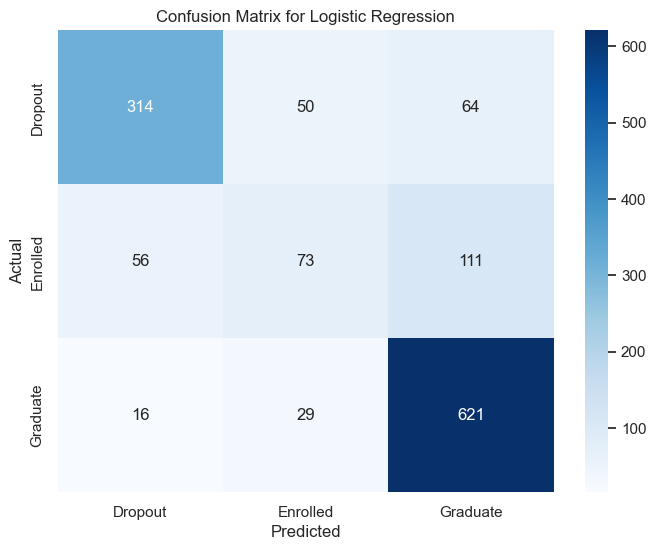

In [32]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Predict the labels for the test set
y_pred = logreg.predict(X_test_scaled)

# Evaluate the model
print("Logistic Regression Performance:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=logreg.classes_, yticklabels=logreg.classes_)
plt.title("Confusion Matrix for Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [33]:
# Train Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000, random_state=42, solver='newton-cg')
logistic_model.fit(X_balanced, y_balanced)

# Predict on the test set
y_pred = logistic_model.predict(X_test)

# Evaluate the model
logistic_report = classification_report(y_test, y_pred, target_names=['Dropout', 'Enrolled', 'Graduate'], output_dict=True)

# Convert the report to a DataFrame
logistic_regression_report_df = pd.DataFrame(logistic_report).transpose()

logistic_regression_report_df

precision    recall  f1-score      support
Dropout        0.879412  0.698598  0.778646   428.000000
Enrolled       0.467066  0.650000  0.543554   240.000000
Graduate       0.842424  0.834835  0.838612   666.000000
accuracy       0.757871  0.757871  0.757871     0.757871
macro avg      0.729634  0.727811  0.720271  1334.000000
weighted avg   0.786761  0.757871  0.766289  1334.000000

In [34]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

# Check if it's binary classification (2x2 matrix)
if conf_mat.shape == (2, 2):
    tn, fp, fn, tp = conf_mat.ravel()
    print('True positive: ', tp)
    print('True negatives: ', tn)
    print('False positive: ', fp)
    print('False negatives: ', fn)
else:
    # Multi-class classification
    print("Multi-class confusion matrix, cannot unpack directly.")
    for i in range(conf_mat.shape[0]):
        print(f"Metrics for Class {i}:")
        tp = conf_mat[i, i]
        fn = conf_mat[i, :].sum() - tp
        fp = conf_mat[:, i].sum() - tp
        tn = conf_mat.sum() - (tp + fn + fp)
        print(f"  True Positives: {tp}")
        print(f"  True Negatives: {tn}")
        print(f"  False Positives: {fp}")
        print(f"  False Negatives: {fn}")


[[299  85  44]
 [ 24 156  60]
 [ 17  93 556]]
Multi-class confusion matrix, cannot unpack directly.
Metrics for Class 0:
  True Positives: 299
  True Negatives: 865
  False Positives: 41
  False Negatives: 129
Metrics for Class 1:
  True Positives: 156
  True Negatives: 916
  False Positives: 178
  False Negatives: 84
Metrics for Class 2:
  True Positives: 556
  True Negatives: 564
  False Positives: 104
  False Negatives: 110


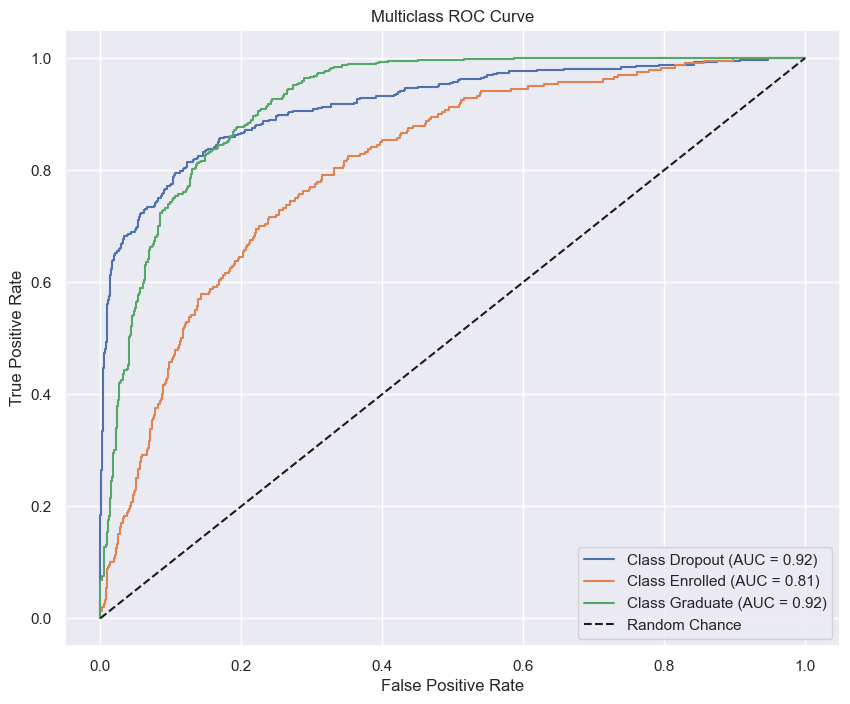

In [35]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize

# Binarize the target variable for multiclass ROC
classes = logreg.classes_
y_test_binarized = label_binarize(y_test, classes=classes)
y_proba = logreg.predict_proba(X_test_scaled)  # Get prediction probabilities

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
for i, class_label in enumerate(classes):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_proba[:, i])
    roc_auc = roc_auc_score(y_test_binarized[:, i], y_proba[:, i])
    plt.plot(fpr, tpr, label=f"Class {class_label} (AUC = {roc_auc:.2f})")

# Plot diagonal line for random chance
plt.plot([0, 1], [0, 1], 'k--', label="Random Chance")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multiclass ROC Curve")
plt.legend(loc="best")
plt.show()


---
## K-Nearest Neighbors

In [36]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [37]:
#Testing time may take long
print('Training accuracy: ', knn.score(X_train_scaled,y_train))
print('Testing accuracy: ', knn.score(X_test_scaled, y_test))

Training accuracy:  0.7863110539845758
Testing accuracy:  0.6754122938530734


In [38]:
knn_pred = knn.predict(X_test_scaled)
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

     Dropout       0.74      0.66      0.70       428
    Enrolled       0.36      0.26      0.30       240
    Graduate       0.71      0.84      0.77       666

    accuracy                           0.68      1334
   macro avg       0.61      0.59      0.59      1334
weighted avg       0.66      0.68      0.66      1334



In [39]:
print(f"Length of y_test: {len(y_test)}")
print(f"Length of knn_pred: {len(knn_pred)}")


Length of y_test: 1334
Length of knn_pred: 1334


In [40]:
# Evaluate the model
knn_report = classification_report(
    y_test, knn_pred, target_names=['Dropout', 'Enrolled', 'Graduate'], output_dict=True
)

# Convert the report to a DataFrame
knn_report_df = pd.DataFrame(knn_report).transpose()

knn_report_df

precision    recall  f1-score      support
Dropout        0.739474  0.656542  0.695545   428.000000
Enrolled       0.362069  0.262500  0.304348   240.000000
Graduate       0.714103  0.836336  0.770401   666.000000
accuracy       0.675412  0.675412  0.675412     0.675412
macro avg      0.605215  0.585126  0.590098  1334.000000
weighted avg   0.658908  0.675412  0.662536  1334.000000

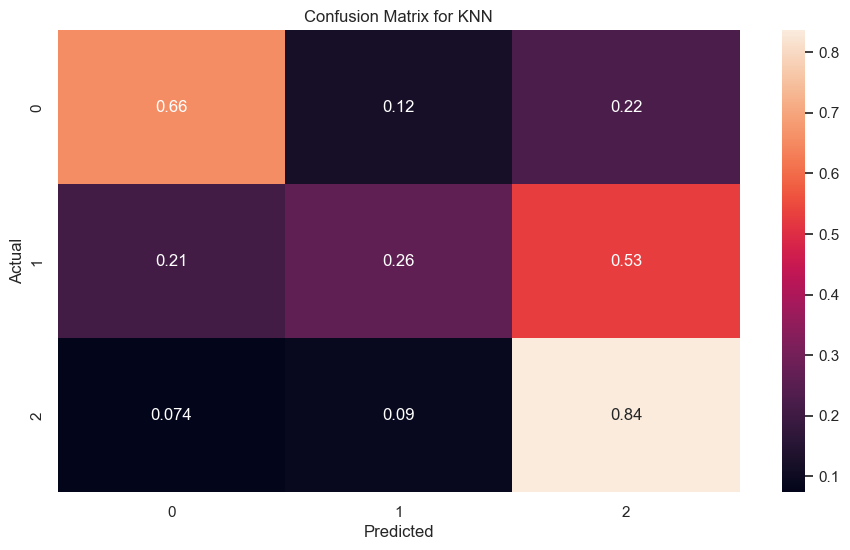

In [41]:
knn_conf_mat = confusion_matrix(y_test, knn_pred,normalize='true')
sns.heatmap(knn_conf_mat, annot=True)
plt.title("Confusion Matrix for KNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [42]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for K
param_grid = {'n_neighbors': [3, 5, 7, 9, 11]}

# GridSearchCV to find the best K
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Best parameters and accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validated Accuracy:", grid_search.best_score_)

# Evaluate the best model
best_knn = grid_search.best_estimator_
y_pred_best = best_knn.predict(X_test_scaled)
print("\nClassification Report for Best KNN:")
classification_report(y_test, y_pred_best)


Best Parameters: {'n_neighbors': 11}
Best Cross-Validated Accuracy: 0.7021238380825071

Classification Report for Best KNN:


'              precision    recall  f1-score   support\n\n     Dropout       0.82      0.64      0.72       428\n    Enrolled       0.43      0.20      0.27       240\n    Graduate       0.69      0.92      0.79       666\n\n    accuracy                           0.70      1334\n   macro avg       0.65      0.59      0.59      1334\nweighted avg       0.68      0.70      0.67      1334\n'

## Support Vector Machines (SVM)

In [43]:
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
svm_model = SVC(kernel='rbf', C=1, gamma='scale', random_state=42,)
svm_model.fit(X_train_scaled, y_train)
# Encode labels again if needed
label_encoder = LabelEncoder()
y_pca = label_encoder.fit_transform(y_train)
# Encode labels again if needed

In [44]:

# Make predictions
y_pred = svm_model.predict(X_test_scaled)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))



Accuracy: 0.7593703148425787

Classification Report:
               precision    recall  f1-score   support

     Dropout       0.83      0.70      0.76       428
    Enrolled       0.56      0.33      0.41       240
    Graduate       0.76      0.95      0.85       666

    accuracy                           0.76      1334
   macro avg       0.72      0.66      0.67      1334
weighted avg       0.75      0.76      0.74      1334


Confusion Matrix:
 [[300  46  82]
 [ 47  78 115]
 [ 15  16 635]]


In [45]:
# Evaluate the model
svm_report = classification_report(y_test, y_pred, target_names=['Dropout', 'Enrolled', 'Graduate'], output_dict=True)

# Convert the report to a DataFrame
svm_report_df = pd.DataFrame(svm_report).transpose()

svm_report_df

precision    recall  f1-score     support
Dropout        0.828729  0.700935  0.759494   428.00000
Enrolled       0.557143  0.325000  0.410526   240.00000
Graduate       0.763221  0.953453  0.847797   666.00000
accuracy       0.759370  0.759370  0.759370     0.75937
macro avg      0.716364  0.659796  0.672606  1334.00000
weighted avg   0.747163  0.759370  0.740796  1334.00000

In [46]:
print("X_train_scaled shape:", X_train_scaled.shape)
print("X_test_scaled shape:", X_test_scaled.shape)


X_train_scaled shape: (3112, 36)
X_test_scaled shape: (1334, 36)


In [47]:
#def plotSVC(kernel_name, svc, X, y):
    # Create a mesh grid for decision boundary
 #   x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  #  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
#    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
 #                        np.arange(y_min, y_max, 0.01))
    
    # Predict on the grid
 #   Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
  #  Z = Z.reshape(xx.shape)
    
    # Plot the decision boundary
   # plt.figure(figsize=(8, 6))
    #plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    #plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=50, edgecolors='k')
    #plt.title(f"SVM Decision Boundary ({kernel_name})")
    #plt.xlabel("Principal Component 1")
    #plt.ylabel("Principal Component 2")
    #plt.show()

# Step 3: Train SVM models with different kernels and plot
#kernels = ['linear', 'rbf', 'poly']
#for kernel in kernels:
#    svc = SVC(kernel=kernel, gamma='auto').fit(X_pca, y_pca)
#    plotSVC(kernel_name=kernel, svc=svc, X=X_pca, y=y_pca)

### Decision Trees

In [48]:
from sklearn.tree import DecisionTreeClassifier, plot_tree # Import Decision Tree Classifier and plotting function

clf = DecisionTreeClassifier()
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [49]:
#First split to get 20% as test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
#Split the training set again to get the validation set (requires calculation the get the needed percentage)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.125, random_state=1)
# 12.5% of 80% is 10% of the whole dataset (0.125 x 0.8 = 0.1)

print('Training set: ', y_train.shape)
print('Validation set: ', y_val.shape)
print('Testing set: ', y_test.shape)

Training set:  (3111,)
Validation set:  (445,)
Testing set:  (890,)


In [50]:
# Train Decision Tree model
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
# Predict on the test set
y_pred_dt = decision_tree_model.predict(X_test)

# Evaluate the model
decision_tree_report = classification_report(y_test, y_pred_dt, target_names=['Dropout', 'Enrolled', 'Graduate'], output_dict=True)

# Convert the report to a DataFrame
decision_tree_report_df = pd.DataFrame(decision_tree_report).transpose()

decision_tree_report_df

precision    recall  f1-score     support
Dropout        0.673540  0.695035  0.684119  282.000000
Enrolled       0.376543  0.403974  0.389776  151.000000
Graduate       0.810069  0.774617  0.791946  457.000000
accuracy       0.686517  0.686517  0.686517    0.686517
macro avg      0.620050  0.624542  0.621947  890.000000
weighted avg   0.693256  0.686517  0.689547  890.000000

### Random Forest

In [51]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, AdaBoostClassifier
# Train Random Forest model
random_forest_model = RandomForestClassifier(random_state=42, n_estimators=100)
random_forest_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = random_forest_model.predict(X_test)

# Evaluate the model
rf_report = classification_report(
    y_test, y_pred_rf, target_names=['Dropout', 'Enrolled', 'Graduate'], output_dict=True
)

# Convert the report to a DataFrame
rf_report_df = pd.DataFrame(rf_report).transpose()

rf_report_df

precision    recall  f1-score    support
Dropout        0.847737  0.730496  0.784762  282.00000
Enrolled       0.545455  0.397351  0.459770  151.00000
Graduate       0.810056  0.951860  0.875252  457.00000
accuracy       0.787640  0.787640  0.787640    0.78764
macro avg      0.734416  0.693236  0.706595  890.00000
weighted avg   0.777102  0.787640  0.776088  890.00000

## Advanced Ensemble Method

### Bagging (Bagged Decision Trees)

In [52]:
bagging_model = BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42), n_estimators=50, random_state=42)
bagging_model.fit(X_train, y_train)
y_pred_bagging = bagging_model.predict(X_test)
bagging_report = classification_report(y_test, y_pred_bagging, target_names=['Dropout', 'Enrolled', 'Graduate'], output_dict=True)
bagging_report_df = pd.DataFrame(bagging_report).transpose()
bagging_report_df

precision    recall  f1-score     support
Dropout        0.850622  0.726950  0.783939  282.000000
Enrolled       0.518797  0.456954  0.485915  151.000000
Graduate       0.833333  0.940919  0.883864  457.000000
accuracy       0.791011  0.791011  0.791011    0.791011
macro avg      0.734251  0.708274  0.717906  890.000000
weighted avg   0.785446  0.791011  0.784685  890.000000

### Gradient Boost

In [53]:
# Train Gradient Boosting model
gradient_boosting_model = GradientBoostingClassifier(random_state=42, n_estimators=100, learning_rate=0.1)
gradient_boosting_model.fit(X_train, y_train)

# Predict on the test set
y_pred_gb = gradient_boosting_model.predict(X_test)

# Evaluate the model
gb_report = classification_report(
    y_test, y_pred_gb, target_names=['Dropout', 'Enrolled', 'Graduate'], output_dict=True
)

# Convert the report to a DataFrame
gb_report_df = pd.DataFrame(gb_report).transpose()

gb_report_df

precision    recall  f1-score    support
Dropout        0.849593  0.741135  0.791667  282.00000
Enrolled       0.528000  0.437086  0.478261  151.00000
Graduate       0.820809  0.932166  0.872951  457.00000
accuracy       0.787640  0.787640  0.787640    0.78764
macro avg      0.732801  0.703462  0.714293  890.00000
weighted avg   0.780251  0.787640  0.780231  890.00000

## XGBoost

In [54]:
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier

# Initialize the encoder
label_encoder = LabelEncoder()

# Fit and transform y_train and y_test
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Train XGBoost model with encoded labels
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train_encoded)

# Predict on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Decode predictions back to original labels for evaluation
y_pred_xgb_decoded = label_encoder.inverse_transform(y_pred_xgb)

# Evaluate the model
xgb_report = classification_report(
    y_test, y_pred_xgb_decoded, target_names=['Dropout', 'Enrolled', 'Graduate'], output_dict=True
)

# Convert the report to a DataFrame
xgb_report_df = pd.DataFrame(xgb_report).transpose()

xgb_report_df


precision    recall  f1-score    support
Dropout        0.866379  0.712766  0.782101  282.00000
Enrolled       0.480000  0.476821  0.478405  151.00000
Graduate       0.836614  0.929978  0.880829  457.00000
accuracy       0.784270  0.784270  0.784270    0.78427
macro avg      0.727664  0.706522  0.713778  890.00000
weighted avg   0.785541  0.784270  0.781270  890.00000

## AdaBoost

In [55]:
adaboost_model = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1, random_state=42),
                                    n_estimators=50, learning_rate=1.0, random_state=42)
adaboost_model.fit(X_train, y_train)
y_pred_adaboost = adaboost_model.predict(X_test)
adaboost_report = classification_report(y_test, y_pred_adaboost, target_names=['Dropout', 'Enrolled', 'Graduate'], output_dict=True)
adaboost_report_df = pd.DataFrame(adaboost_report).transpose()
adaboost_report_df

C:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


precision    recall  f1-score     support
Dropout        0.811538  0.748227  0.778598  282.000000
Enrolled       0.467213  0.377483  0.417582  151.000000
Graduate       0.816929  0.908096  0.860104  457.000000
accuracy       0.767416  0.767416  0.767416    0.767416
macro avg      0.698560  0.677936  0.685428  890.000000
weighted avg   0.755887  0.767416  0.759199  890.000000

## Cross Validation and Evaluation

In [56]:
# Adjusted function to handle both dictionary and DataFrame formats
def extract_metrics(report, model_name):
    if isinstance(report, pd.DataFrame):
        # Handle DataFrame format
        model_results[model_name] = {
            'Accuracy': report.loc['accuracy', 'f1-score'] * 100 if 'accuracy' in report.index else 0,
            'Macro Avg Precision': report.loc['macro avg', 'precision'] * 100 if 'macro avg' in report.index else 0,
            'Macro Avg Recall': report.loc['macro avg', 'recall'] * 100 if 'macro avg' in report.index else 0,
            'Macro Avg F1-Score': report.loc['macro avg', 'f1-score'] * 100 if 'macro avg' in report.index else 0
        }
    else:
        # Handle dictionary format
        model_results[model_name] = {
            'Accuracy': report['accuracy'] * 100 if 'accuracy' in report else 0,
            'Macro Avg Precision': report['macro avg']['precision'] * 100 if 'macro avg' in report else 0,
            'Macro Avg Recall': report['macro avg']['recall'] * 100 if 'macro avg' in report else 0,
            'Macro Avg F1-Score': report['macro avg']['f1-score'] * 100 if 'macro avg' in report else 0
        }

# Extract metrics for each model
model_results = {}
extract_metrics(logistic_regression_report_df, 'Logistic Regression')
extract_metrics(decision_tree_report_df, 'Decision Tree')
extract_metrics(svm_report_df, 'SVM')
extract_metrics(knn_report_df, 'KNN')
extract_metrics(rf_report_df, 'Random Forest')
extract_metrics(bagging_report_df, 'Bagging')
extract_metrics(gb_report_df, 'Gradient Boosting')
extract_metrics(xgb_report_df, 'XGBoost')
extract_metrics(adaboost_report_df, 'AdaBoost')

# Convert results to a DataFrame
summary_df_dynamic = pd.DataFrame.from_dict(model_results, orient='index')
summary_df_dynamic

Accuracy  Macro Avg Precision  Macro Avg Recall  \
Logistic Regression  75.787106            72.963396         72.781099   
Decision Tree        68.651685            62.005046         62.454201   
SVM                  75.937031            71.636443         65.979601   
KNN                  67.541229            60.521507         58.512613   
Random Forest        78.764045            73.441568         69.323580   
Bagging              79.101124            73.425091         70.827434   
Gradient Boosting    78.764045            73.280091         70.346238   
XGBoost              78.426966            72.766449         70.652176   
AdaBoost             76.741573            69.856024         67.793556   

                     Macro Avg F1-Score  
Logistic Regression           72.027074  
Decision Tree                 62.194711  
SVM                           67.260568  
KNN                           59.009783  
Random Forest                 70.659451  
Bagging                       71.790621  
Gradient Boosting             71.429279  
XGBoost                       71.377850  
AdaBoost                      68.542794

### Implemeent k-fold cross-validation for additional robustness

In [65]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)  # Suppress warnings

# Check class distribution
print(df2['Target'].value_counts())

# Prepare features (X) and target (y)
X = df2.drop(columns=['Target'])  # Drop the target column
y = df2['Target']  # Target column

# Encode the target labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Update StratifiedKFold to use appropriate n_splits
kf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Dictionary to store average cross-validation results
cv_results = {}

# Function to perform k-fold cross-validation
def evaluate_model(model, X, y, model_name):
    scoring = {
        'accuracy': 'accuracy',
        'precision': make_scorer(precision_score, average='macro'),
        'recall': make_scorer(recall_score, average='macro'),
        'f1': make_scorer(f1_score, average='macro')
    }
    scores = {}
    for metric, scorer in scoring.items():
        score = cross_val_score(model, X, y, cv=kf, scoring=scorer, n_jobs=-1)  # Parallelized
        scores[metric] = score.mean() * 100  # Convert to percentage
    cv_results[model_name] = scores

# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42, solver='lbfgs'),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'SVM': SVC(kernel='linear', random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'Bagging': BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42), n_estimators=50, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42, n_estimators=100),
    'XGBoost': XGBClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(
        estimator=DecisionTreeClassifier(max_depth=1, random_state=42),
        n_estimators=50,
        learning_rate=1.0,
        algorithm='SAMME',  # Updated to SAMME
        random_state=42
    )
}

# Evaluate each model
for model_name, model in models.items():
    print(f"Evaluating {model_name}...")
    evaluate_model(model, X_scaled, y_encoded, model_name)  # Use scaled features

# Convert results to DataFrame
cv_results_df = pd.DataFrame(cv_results).transpose()

# Display the results
# Option 1: Print the DataFrame
print(cv_results_df)

# Option 2: Save to a CSV file for further analysis
cv_results_df.to_csv('cv_results.csv', index=True)
print("Cross-validation results saved to 'cv_results.csv'.")


Target
Graduate    2221
Dropout     1427
Enrolled     798
Name: count, dtype: int64
Evaluating Logistic Regression...
Evaluating Decision Tree...
Evaluating SVM...
Evaluating KNN...
Evaluating Random Forest...
Evaluating Bagging...
Evaluating Gradient Boosting...
Evaluating XGBoost...
Evaluating AdaBoost...
                      accuracy  precision     recall         f1
Logistic Regression  76.428250  70.320794  66.654034  67.340143
Decision Tree        68.196131  61.501783  61.587375  61.517340
SVM                  76.360774  70.950980  67.219881  68.258121
KNN                  70.040486  62.702245  60.447468  60.917184
Random Forest        77.350427  72.676758  67.891666  68.919862
Bagging              76.855601  71.460120  68.433645  69.340333
Gradient Boosting    77.530364  72.546623  69.139175  70.127375
XGBoost              77.642825  72.372481  69.485545  70.388067
AdaBoost             74.561404  67.593040  64.645682  64.943916
Cross-validation results saved to 'cv_results.csv'.

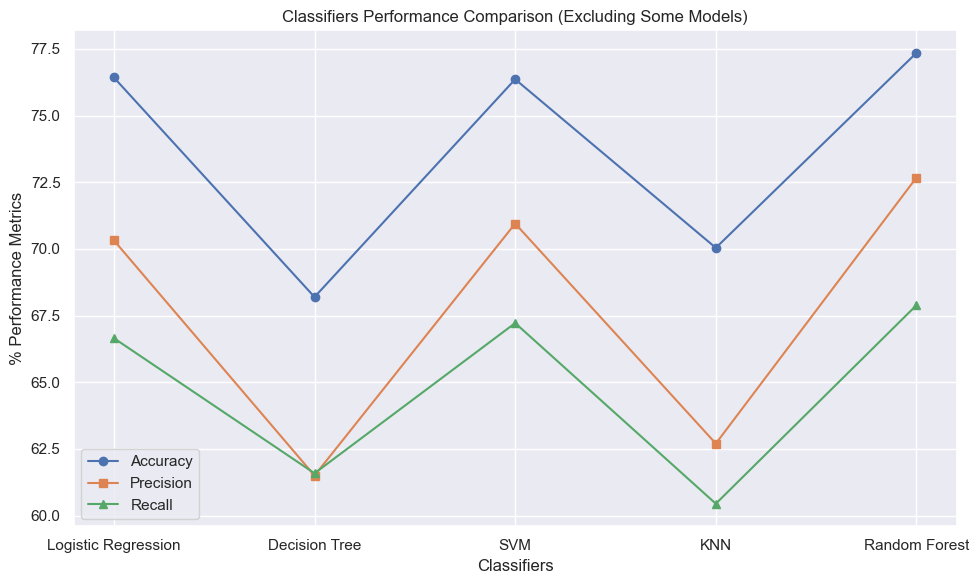

In [67]:

# Load the cross-validation results from the CSV file
cv_results_df = pd.read_csv('cv_results.csv', index_col=0)

# Exclude specified classifiers
excluded_classifiers = ['Bagging', 'Gradient Boosting', 'XGBoost','AdaBoost']
filtered_df = cv_results_df[~cv_results_df.index.isin(excluded_classifiers)]

# Select the metric to be used for the x-axis
x_axis_metric = 'classifiers'  # Options: 'classifiers', 'accuracy', 'precision', 'recall'

# Prepare the x-axis data
if x_axis_metric == 'classifiers':
    x_data = filtered_df.index.tolist()
else:
    x_data = filtered_df[x_axis_metric].tolist()

# Extract data for the plot
accuracy = filtered_df['accuracy'].tolist()
precision = filtered_df['precision'].tolist()
recall = filtered_df['recall'].tolist()

# Create the plot
plt.figure(figsize=(10, 6))

# Plot each metric
plt.plot(x_data, accuracy, marker='o', linestyle='-', label='Accuracy')
plt.plot(x_data, precision, marker='s', linestyle='-', label='Precision')
plt.plot(x_data, recall, marker='^', linestyle='-', label='Recall')

# Add labels, title, and legend
plt.title('Classifiers Performance Comparison (Excluding Some Models)')
plt.xlabel(x_axis_metric.capitalize())
plt.ylabel('% Performance Metrics')
plt.legend(loc='best')

# Display grid for better readability
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


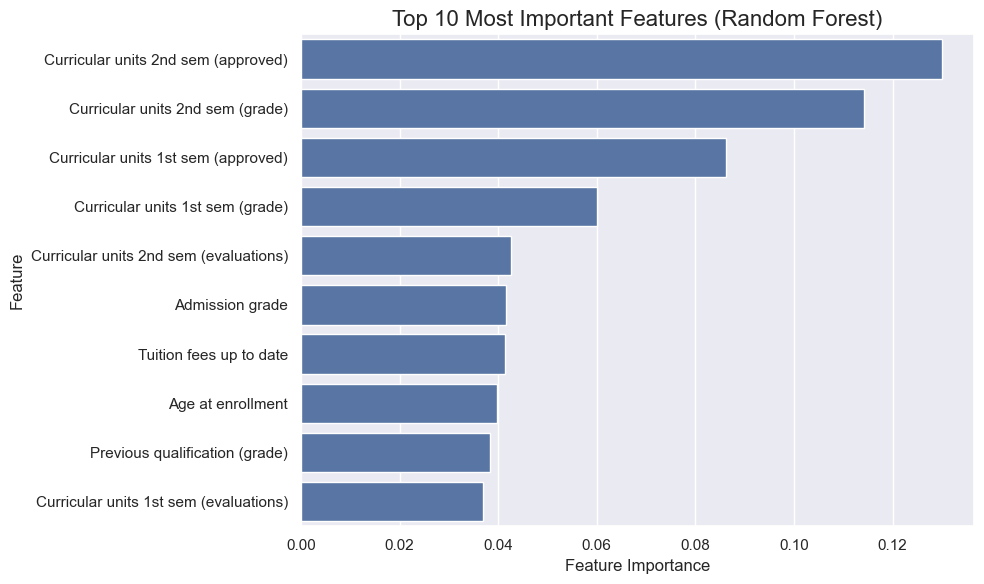

Top 10 Important Features:
                                           Feature  Importance
30             Curricular units 2nd sem (approved)    0.130009
31                Curricular units 2nd sem (grade)    0.114101
24             Curricular units 1st sem (approved)    0.086185
25                Curricular units 1st sem (grade)    0.059968
29          Curricular units 2nd sem (evaluations)    0.042590
12                                 Admission grade    0.041491
16                         Tuition fees up to date    0.041386
19                               Age at enrollment    0.039778
6                   Previous qualification (grade)    0.038242
23          Curricular units 1st sem (evaluations)    0.036902
3                                           Course    0.034273
11                             Father's occupation    0.029493
10                             Mother's occupation    0.026476
35                                             GDP    0.024421
33                          

In [62]:
# Extract feature importance
feature_importances = pd.DataFrame({
    'Feature': X_balanced.columns,
    'Importance': random_forest_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot the top 10 most important features
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importances.head(10), x='Importance', y='Feature')  # Removed `palette`
plt.title('Top 10 Most Important Features (Random Forest)', fontsize=16)
plt.xlabel('Feature Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.show()

# Display the top features as a DataFrame
print("Top 10 Important Features:")
print(feature_importances.head(40))


In [63]:
# Select the top 10 features based on importance
top_features = feature_importances['Feature'].head(10).values
X_train_top = X_balanced[top_features]
X_test_top = X_test[top_features]

# Train Random Forest model with selected features
rf_model_top_features = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model_top_features.fit(X_train_top, y_balanced)

# Predict on the test set
y_pred_rf_top = rf_model_top_features.predict(X_test_top)

# Evaluate the model
rf_top_report = classification_report(
    y_test, y_pred_rf_top, target_names=['Dropout', 'Enrolled', 'Graduate'], output_dict=True
)

# Convert the report to a DataFrame
rf_top_report_df = pd.DataFrame(rf_top_report).transpose()

# Output the results
rf_top_report_df


precision  recall  f1-score  support
Dropout             1.0     1.0       1.0    282.0
Enrolled            1.0     1.0       1.0    151.0
Graduate            1.0     1.0       1.0    457.0
accuracy            1.0     1.0       1.0      1.0
macro avg           1.0     1.0       1.0    890.0
weighted avg        1.0     1.0       1.0    890.0